In [ ]:
"""
Purpose: 
To create the function that will create a mapping correspondence
of skeletal branches (those with no node degrees higher than 3)
and the meshes themselves




"""

In [1]:
from os import sys
sys.path.append("../../meshAfterParty/")

In [2]:
import skeleton_utils as sk
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu


In [3]:
saved_file = "../../Platinum_Compartment/soma_touching_mesh_data.npz"
current_mesh_data = nu.load_dict(saved_file)

In [4]:
# visualize all of the branches and the meshes
sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
                          other_meshes_colors="random",
                           other_skeletons = current_mesh_data[0]["branch_skeletons"],
                          other_skeletons_colors="random")

In [5]:
skelton_cleaning_threshold = 4001
total_cleaned = []
for j,curr_skeleton_to_clean in enumerate(current_mesh_data[0]["branch_skeletons"]):
    print(f"\n---- Working on Limb {j} ----")
    start_time = time.time()
    print(f"before cleaning limb size of skeleton = {curr_skeleton_to_clean.shape}")
    distance_cleaned_skeleton = sk.clean_skeleton(
                                                curr_skeleton_to_clean,
                                                distance_func=sk.skeletal_distance,
                                                min_distance_to_junction = skelton_cleaning_threshold,
                                                return_skeleton=True,
                                                print_flag=False) 
    #make sure still connected componet
    distance_cleaned_skeleton_components = nx.number_connected_components(sk.convert_skeleton_to_graph(distance_cleaned_skeleton))
    if distance_cleaned_skeleton_components > 1:
        raise Exception(f"distance_cleaned_skeleton {j} was not a single component: it was actually {distance_cleaned_skeleton_components} components")
        
    print(f"after DISTANCE cleaning limb size of skeleton = {distance_cleaned_skeleton.shape}")
    cleaned_branch = sk.clean_skeleton_with_decompose(distance_cleaned_skeleton)
    
    cleaned_branch_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cleaned_branch))
    if cleaned_branch_components > 1:
        raise Exception(f"cleaned_branch {j} was not a single component: it was actually {cleaned_branch_components} components")
    
    #do the cleanin ghtat removes loops from branches
    print(f"After DECOMPOSITION cleaning limb size of skeleton = {cleaned_branch.shape}")
    print(f"Total time = {time.time() - start_time}")
    total_cleaned.append(cleaned_branch)
    
current_mesh_data[0]["branch_skeletons_cleaned"] = total_cleaned
    


---- Working on Limb 0 ----
before cleaning limb size of skeleton = (4140, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (4004, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (4004, 2, 3)
Total time = 1.235182523727417

---- Working on Limb 1 ----
before cleaning limb size of skeleton = (2975, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (2936, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {2179}
After DECOMPOSITION cleaning limb size of skeleton = (2934, 2, 3)
Total time = 0.8420083522796631

---- Working on Limb 2 ----
before cleaning limb size of skeleton = (2025, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (1981, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {1547}
After DECOMPOSITION cleaning limb size of skeleton = (1979, 2, 3)
Total time = 0.542466402053833

---- Working on Limb 3 ----
before cleaning limb size of skeleton = (1840, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (1804, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (1804, 2, 3)
Total time = 0.5716464519500732

---- Working on Limb 4 ----
before cleaning limb size of skeleton = (2273, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (2166, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (2166, 2, 3)
Total time = 0.675464391708374

---- Working on Limb 5 ----
before cleaning limb size of skeleton = (1131, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (1107, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (1107, 2, 3)
Total time = 0.3097097873687744

---- Working on Limb 6 ----
before cleaning limb size of skeleton = (1063, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (1034, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (1034, 2, 3)
Total time = 0.30606698989868164

---- Working on Limb 7 ----
before cleaning limb size of skeleton = (1052, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (1013, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (1013, 2, 3)
Total time = 0.28774404525756836

---- Working on Limb 8 ----
before cleaning limb size of skeleton = (687, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (671, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (671, 2, 3)
Total time = 0.19653058052062988

---- Working on Limb 9 ----
before cleaning limb size of skeleton = (254, 2, 3)
Using Distance measure skeletal_distance



after DISTANCE cleaning limb size of skeleton = (241, 2, 3)
After DECOMPOSITION cleaning limb size of skeleton = (241, 2, 3)
Total time = 0.08728671073913574

---- Working on Limb 10 ----
before cleaning limb size of skeleton = (31, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (31, 2, 3)
only one skeleton so no stacking needed
After DECOMPOSITION cleaning limb size of skeleton = (31, 2, 3)
Total time = 0.011926651000976562


In [553]:
# visualize all of the branches and the meshes
sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
                          other_meshes_colors="random",
                           other_skeletons = current_mesh_data[0]["branch_skeletons_cleaned"],
                          other_skeletons_colors="random",
                          mesh_alpha=0.15)

# checking that all the cleaned branches are connected components

In [7]:
for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Original limb {k} was not a single component: it was actually {n_components} components")
    
for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons_cleaned"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Cleaned limb {k} was not a single component: it was actually {n_components} components")

# new correspondence function

In [9]:
from skeleton_utils import *

def get_skeletal_distance(main_mesh,edges,
                                 buffer=0.01,
                                bbox_ratio=1.2,
                               distance_threshold=3000,
                                print_flag=False):
    """
    Purpose: To return the histogram of distances along a mesh subtraction process
    so that we could evenutally find an adaptive distance threshold
    
    
    """

    
    main_mesh_bbox_restricted = main_mesh
    faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))

    
    start_time = time.time()
    face_subtract_indices = []
    
    edge_loop_print=True
    total_distances = []
    total_distances_std = []
    for i,ex_edge in tqdm(enumerate(edges)):
        #print("\n------ New loop ------")
        #print(ex_edge)
        
        # ----------- creating edge and checking distance ----- #
        loop_start = time.time()
        
        edge_line = ex_edge[1] - ex_edge[0]
        sum_threshold = 0.001
        if np.sum(np.abs(edge_line)) < sum_threshold:
            if edge_loop_print:
                print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
            continue
        
        cob_edge = change_basis_matrix(edge_line)
        
        #get the limits of the example edge itself that should be cutoff
        edge_trans = (cob_edge@ex_edge.T)
        #slice_range = np.sort((cob_edge@ex_edge.T)[2,:])
        slice_range = np.sort(edge_trans[2,:])

        # adding the buffer to the slice range
        slice_range_buffer = slice_range + np.array([-buffer,buffer])

        # generate face midpoints from the triangles
        #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
        face_midpoints = main_mesh_bbox_restricted.triangles_center
        
        
        #get the face midpoints that fall within the slice (by lookig at the z component)
        fac_midpoints_trans = cob_edge@face_midpoints.T
        
        slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
                      (fac_midpoints_trans[2,:]<slice_range_buffer[1]))

        edge_midpoint = np.mean(edge_trans.T,axis=0)
        distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        slice_mask = slice_mask_pre_distance & distance_check
        
        face_list = np.arange(0,len(main_mesh_bbox_restricted.faces))[slice_mask]

        #get the submesh of valid faces within the slice
        if len(face_list)>0:
            main_mesh_sub = main_mesh_bbox_restricted.submesh([face_list],append=True)
        else:
            main_mesh_sub = []

        if type(main_mesh_sub) != type(trimesh.Trimesh()):
            if edge_loop_print:
                print(f"THERE WERE NO FACES THAT FIT THE DISTANCE ({distance_threshold}) and Z transform requirements")
                print("So just skipping this edge")
            continue


        #get all disconnected mesh pieces of the submesh and the face indices for lookup later
        sub_components,sub_components_face_indexes = tu.split(main_mesh_sub,only_watertight=False)
       
        
        
        if type(sub_components) != type(np.array([])) and type(sub_components) != list:
            #print(f"meshes = {sub_components}, with type = {type(sub_components)}")
            if type(sub_components) == type(trimesh.Trimesh()) :
                sub_components = [sub_components]
            else:
                raise Exception("The sub_components were not an array, list or trimesh")
        

        #getting the indices of the submeshes whose bounding box contain the edge 
        contains_points_results = np.array([s_comp.bounding_box.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        
        containing_indices = (np.arange(0,len(sub_components)))[np.sum(contains_points_results,axis=1) >= len(ex_edge)]
        try:
            if len(containing_indices) != 1: 
                if edge_loop_print:
                    print(f"--> Not exactly one containing mesh: {containing_indices}")
                if len(containing_indices) > 1:
                    sub_components_inner = sub_components[containing_indices]
                    sub_components_face_indexes_inner = sub_components_face_indexes[containing_indices]
                else:
                    sub_components_inner = sub_components
                    sub_components_face_indexes_inner = sub_components_face_indexes

                #get the center of the edge
                edge_center = np.mean(ex_edge,axis=0)
                #print(f"edge_center = {edge_center}")

                #find the distance between eacch bbox center and the edge center
                bbox_centers = [np.mean(k.bounds,axis=0) for k in sub_components_inner]
                #print(f"bbox_centers = {bbox_centers}")
                closest_bbox = np.argmin([np.linalg.norm(edge_center-b_center) for b_center in bbox_centers])
                #print(f"bbox_distance = {closest_bbox}")
                edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes_inner[closest_bbox]]]


            else:# when only one viable submesh piece and just using that sole index
                edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes[containing_indices[0]]]]
        except:
            print(f"sub_components = {sub_components}")
            print(f"containing_indices = {containing_indices}")
            print(f"sub_components_face_indexes (from the split) = {sub_components_face_indexes}")
            raise Exception("Error occured")


        if len(edge_skeleton_faces) < 0:
            print(f"****** Warning the edge index {i}: had no faces in the edge_skeleton_faces*******")
        face_subtract_indices.append(edge_skeleton_faces)
        
        
        #---- calculating the relevant distances ---- #
        
        face_midpoints = (main_mesh_bbox_restricted.triangles_center)[edge_skeleton_faces]
        #print(f"edge_skeleton_faces.shape = {edge_skeleton_faces.shape}")
#         print(f"cob_edge = {cob_edge}")
#         print(f"face_midpoints = {face_midpoints.shape}")
#         print(f"sub_components = {sub_components}")
#         print(f"containing_indices = {containing_indices}")
#         print(f"sub_components_face_indexes (from the split) = {sub_components_face_indexes}")
        #Exception("failed on fac_midpoints_trans")
        
        fac_midpoints_trans = cob_edge@face_midpoints.T
        
            
        #print(f"fac_midpoints_trans.shape = {fac_midpoints_trans.shape}")
        mesh_slice_distances = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1)
        #print(f"mesh_slice_distances.shape = {mesh_slice_distances.shape}")
        
        total_distances.append(np.mean(mesh_slice_distances))
        total_distances_std.append(np.std(mesh_slice_distances))
    
    
    
    
    if len(face_subtract_indices)>0:
        all_removed_faces = np.concatenate(face_subtract_indices)

        unique_removed_faces = np.array(list(set(all_removed_faces)))
        
        if len(unique_removed_faces) <= 1:
            print(f"Distance of skeleton = {sk.calculate_skeleton_distance(edges)}")
            raise Exception(f"unique_removed_faces = {unique_removed_faces}")
            
            

        #faces_to_keep = set(np.arange(0,len(main_mesh.faces))).difference(unique_removed_faces)
        new_submesh = main_mesh.submesh([unique_removed_faces],only_watertight=False,append=True)
        
        split_meshes,components_faces = tu.split(new_submesh,return_components=True)
        
        new_submesh = split_meshes[0]
        unique_removed_faces = unique_removed_faces[components_faces[0]]
        
        #need to further restric the unique_removed_faces to those of most significant piece
    
    else:
        unique_removed_faces = np.array([])
        new_submesh = trimesh.Trimesh()
 
    
    
    return total_distances,total_distances_std,new_submesh,np.array(unique_removed_faces)


def mesh_correspondence_adaptive_distance(curr_branch_skeleton,
                                          curr_branch_mesh,
                                         skeleton_segment_width = 1000):

    #making the skeletons resized to 1000 widths and then can use outlier finding
    
    new_skeleton  = sk.resize_skeleton_branch(curr_branch_skeleton,segment_width = skeleton_segment_width)

    (segment_skeletal_mean_distances,
     segment_skeletal_std_distances,
     mesh_correspondence,
     mesh_correspondence_indices) = get_skeletal_distance(
                        main_mesh = curr_branch_mesh,
                        edges = new_skeleton,
                        buffer=100,
                        bbox_ratio=1.2,
                        distance_threshold=3000,
                        print_flag=False
    )
        
    if len(mesh_correspondence_indices)== 0:
        print("empty mesh_correspondence_indices returned so returning an empty array")
        return []
    
    #now use the new submesh to calculate the new threshold
    # -- Step where I compute the new threshold and and then rerun it -- #
    if len(segment_skeletal_mean_distances) > 4:
        filtered_measurements = np.array(segment_skeletal_mean_distances[1:-1])
        filtered_measurements_std = np.array(segment_skeletal_std_distances[1:-1])
    else:
        filtered_measurements = np.array(segment_skeletal_mean_distances)
        filtered_measurements_std = np.array(segment_skeletal_std_distances)



    #filter out the other outliers: do anything higher than 150% of median should be discounted
    median_value = np.median(filtered_measurements)
    outlier_mask = filtered_measurements < median_value*1.5
    filtered_measurements = filtered_measurements[outlier_mask]
    filtered_measurements_std = filtered_measurements_std[outlier_mask]

    print(f"filtered_measurements = {filtered_measurements}")

    np.mean(filtered_measurements),np.std(filtered_measurements)

    # try the mesh subtraction again 
    buffer = 100

    total_threshold = np.max(filtered_measurements) + 2*np.max(filtered_measurements_std)
    print(f"new_threshold = {total_threshold}")
    (segment_skeletal_mean_distances_2,
     filtered_measurements_std,
     mesh_correspondence_2,
     mesh_correspondence_indices_2) = get_skeletal_distance(
                        main_mesh = mesh_correspondence,
                        edges = new_skeleton,
                        buffer=100,
                        bbox_ratio=1.2,
                        distance_threshold=total_threshold,
                        print_flag=False
    )
    
    if len(mesh_correspondence_indices_2) == 0:
        print("empty mesh_correspondence_indices_2 returned so returning an empty array")
        return []
        
        
    #want to show the changes in mesh
#     sk.graph_skeleton_and_mesh(other_meshes = [curr_branch_mesh.submesh([mesh_correspondence_indices],append=True)])
#     sk.graph_skeleton_and_mesh(other_meshes = [curr_branch_mesh.submesh([mesh_correspondence_indices[mesh_correspondence_indices_2]],append=True)])
        
    # PROBLEM NOT PASSING BACK A CONNECTED COMPONENT
        
    return mesh_correspondence_indices[mesh_correspondence_indices_2], total_threshold

# -- decomposing all of limbs into branches and finding mesh correspondence using adaptive manner -- 

In [10]:

sk = reload(sk)
tu = reload(tu)
from tqdm.notebook import tqdm
import time
import itertools

start_time = time.time()

limb_correspondence = dict()
soma_containing_idx= 0

total_branch_meshes = []
total_branch_skeletons = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx]
        curr_limb_branches_sk_uneven = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
        
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk_uneven)):
            limb_correspondence[limb_idx][j] = dict()
            
            
            curr_branch_face_correspondence, width_from_skeleton = mesh_correspondence_adaptive_distance(curr_branch_sk,
                                          curr_limb_mesh,
                                         skeleton_segment_width = 1000)
            
            
            
            if len(curr_branch_face_correspondence) > 0:
                curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True)
            else:
                curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))
                
            limb_correspondence[limb_idx][j]["branch_skeleton"] = curr_branch_sk
            limb_correspondence[limb_idx][j]["correspondence_mesh"] = curr_submesh
            limb_correspondence[limb_idx][j]["correspondence_face_idx"] = curr_branch_face_correspondence
            limb_correspondence[limb_idx][j]["width_from_skeleton"] = width_from_skeleton
            
            total_branch_meshes.append(curr_submesh)
            total_branch_skeletons.append(curr_branch_sk)
            
            
print(f"Total time = {time.time() - start_time}")

Working on limb #0


new_skeleton = (44, 2, 3)



filtered_measurements = [235.35614141 295.50582798 282.58422455 208.45049582 111.84423036
 240.15326795 195.22957467 179.6046358  215.70337332 183.76334931
 222.86183322 291.68475329 375.64066972 232.38761407 253.5265144
 401.78139825 280.00784496 219.4453072  342.14479643 430.29074126
 214.73273392 273.92422933 401.37785497 302.19686064 314.01544074
 254.26722848 216.49610007 174.61311501 360.33120724 373.8862993
 323.38882963]
new_threshold = 1018.9984891875927



new_skeleton = (12, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 68.91491071  98.98806728  99.46925241  97.87159894 119.97255252
  80.50298124  81.73595318 118.83832399]
new_threshold = 242.15564086496752


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)



filtered_measurements = [373.99507037 271.13273265 321.75940392]
new_threshold = 682.6378366957541



new_skeleton = (13, 2, 3)



filtered_measurements = [387.47277784 323.06646146 389.49131938 317.60647399 286.77889106
 241.33739709 242.46462949 350.82802786 416.51688446]
new_threshold = 806.813443182617



new_skeleton = (9, 2, 3)



filtered_measurements = [165.74035649 119.25472849 120.06661184  73.37959195  94.18068313
 158.89435349]
new_threshold = 355.6217315176925



new_skeleton = (4, 2, 3)



filtered_measurements = [270.5424422  354.49122599 264.90287129 442.24303365]
new_threshold = 910.093206343433



new_skeleton = (9, 2, 3)



filtered_measurements = [ 63.0168191   85.41382111 232.44693732 189.15774165 179.42195664
 111.85882382]
new_threshold = 545.1024760422708


--> Not exactly one containing mesh: []

new_skeleton = (18, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [172.54097541 110.58592187 123.82588889 166.86276047 128.44043761
 196.07849447 129.8466497  122.92979404 178.24900424 101.72041881
 118.73065559 154.71019919 125.36513606]
new_threshold = 453.77112061004243


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)



filtered_measurements = [224.68038158 212.8646848 ]
new_threshold = 367.1883004986579



new_skeleton = (72, 2, 3)



filtered_measurements = [287.23608428 458.88519922 382.98806812 417.87200185 362.54833025
 378.36916278 398.70865026 322.34805734 336.52053105 513.12291986
 368.05120901 493.48824562 335.03855797 561.61378926 313.04045857
 450.23278349 322.87942083 347.06143871 378.49403615 241.60531687
 614.25085401 543.68200378 475.32909508 232.04562791 296.94254038
 465.16434593 378.75728293 449.84604247 523.61927445 371.06808618
 290.4849495  263.87294993 441.07747598 415.45186052 280.59536745
 354.65595453 331.65303899 265.02945133 255.00450074 498.19600813
 525.03775293 485.22495162 343.28234919 422.18595701 361.28212288
 599.41895422 531.32329929 329.38977365 378.56043358 448.2972398
 277.76939392 498.99690526 465.84966307 444.89171812 424.9154988
 314.95965967 376.38682973 452.66948003 306.02185217]
new_threshold = 1645.0346888655022



new_skeleton = (79, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 81.71046665 141.75266771 104.69553713 102.70601538  80.21243358
  74.70496239 103.7339037  162.68299581 170.27311853 129.66276244
 129.04439082  70.41953961  64.4228008   90.16100208 128.10758138
  82.52500461  94.65545368  73.44867412  71.07158109 105.63821162
 145.11555134 112.08800897 108.73536688 102.24321859  90.20761798
 150.34554186 150.62739121 114.90769523  94.82664039  83.22007377
 118.34122315 100.84841163 164.75544749 103.85850099  94.78804503
 159.59467688 161.1089539  153.15141226 155.09134943 101.27896298
  88.99907327  92.3757578  150.76473084 133.87517171  95.79037293
  67.86538177  89.17686256 115.6839955  110.31149644  73.86923115
 114.66450814 142.12615534 104.42162932  92.53400187 114.32241691
 136.82318037  92.90996943 116.9140693  148.11879

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (15, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [71.95625705 56.88007725 76.938266   62.63503803 91.44564555 96.81270914
 96.45543398 81.69327838]
new_threshold = 197.667491981394


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (45, 2, 3)



filtered_measurements = [378.34685943 449.1134834  691.79260777 471.60828789 783.48259257
 499.98017662 489.93050735 440.21171202 780.27844183 755.7969921
 524.70932393 478.72155932 356.23130275 519.73357413 670.01726834
 420.74260052 527.75008523 491.80644481 655.22989192 629.5038793
 427.40582068 468.06062913 721.08683904 379.57685766 472.78256671
 427.8318896  598.95197088 455.31716936 679.83772791 629.17629712
 607.08026644 385.37421411 585.09710884 543.25209164 530.35350183
 593.92300442 452.59468189]
new_threshold = 2053.9019764078703



new_skeleton = (22, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [108.38365119 119.86380005 223.09399781 175.19779119 103.78034249
  69.87780169  61.48230653  88.62097968 177.03983656 228.61848085
 101.19740757  88.81018734 144.5269129  137.99986074 203.9852639 ]
new_threshold = 539.6046340663437


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (539.6046340663437) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (539.6046340663437) and Z transform requirements
So just skipping this edge

new_skeleton = (71, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [110.88865573 148.42400107 106.87090495  84.06757247  80.51046353
  92.78547779 105.63911832  66.16021381  93.35273598 105.6173805
 124.20058731  92.08976707 102.70431735  79.70080531  86.96971397
  79.83692984 109.77095745  93.02500174 100.92128327 145.07474065
 142.63083634 113.21849673  83.01622296  66.54622471  87.24522763
 163.10075328  78.57911996 107.2836427  160.8854489  113.61665245
 117.78815543 136.35523808 135.82174352 163.78544221 122.82384161
 112.16417208 104.46817298 131.27662631  92.92568308  84.51809959
  91.12294828 112.74080217  80.17481737  81.71480958 108.83769613
  73.93867541 161.47352732 114.04573074  99.12862763  87.98169393
  64.25389239 111.57964101 127.35153977  85.32645462 104.50922945
 131.1186741  113.70933471]
new_threshold = 351.17905689082204


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (52, 2, 3)



filtered_measurements = [480.30796222 497.89980453 389.27943905 420.31197156 516.93843838
 490.65951861 805.60741511 447.55919845 714.47796884 591.40274441
 500.95476759 406.26731864 750.20750083 405.94169247 380.12474071
 397.15773417 390.74096223 527.34408527 591.42396421 703.65871261
 582.77846283 552.36246806 585.21987729 552.23444069 375.65520377
 303.17159391 773.50098969 816.188346   620.96208564 551.10635642
 672.06134551 455.68582164 577.82948042 655.17297738 598.85925129
 576.60613327 470.28350023 579.9432116  484.80549955 617.56272149
 391.87975649 727.43845078 536.37486453 603.71526502 463.98601005
 478.21042125 658.69759985]
new_threshold = 1937.578224338125



new_skeleton = (89, 2, 3)



filtered_measurements = [125.4212328  183.11779487 273.1114392  203.71828477 542.45773179
 573.78735581 641.50691686 394.45658005 512.97930367 627.26629854
 399.92849002 617.16738094 218.85000974 509.29424627 290.53542599
 446.37427895 355.28828471 238.6118627  383.78161692 286.1359999
 614.56565804 240.78907785 356.67060054 475.40254799 500.10936412
 500.4458368  484.69167344 246.98002342 203.24828192 452.10672146
 367.05128738 337.71840592 299.5343852  358.70699727 468.26960043
 525.64959184 346.93464583 570.42834196 574.29091625 452.04255271
 449.79775302 343.46875484 631.78954993 298.15089238 597.59995548
 418.13072885 349.30082658 541.64526537 418.69787058 397.8792688
 335.87492338 356.29865295 420.68864721 560.00382361 515.17525119
 239.46179866 609.03237067 528.24957755 601.22558432 515.61289862
 501.40171013 508.30159445 278.8545526  434.49772152 432.59347466
 427.93257679 353.35825353 392.34985879 386.52073065 648.7257479
 319.81025381 458.25991361 268.1076639  197.46550207 2


new_skeleton = (76, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [291.40949404 243.66719405 180.46815239 372.44945101 295.71170461
 436.65244695 282.28352422 396.5815075  614.49605884 524.19116349
 637.47648006 608.25782174 376.91814917 371.79712303 337.35883654
 504.12069536 386.28903751 362.70415691 444.10730556 392.55203377
 388.74099545 509.82082144 324.91975011 649.07862805 501.91864973
 442.61426393 440.03143318 409.80783396 370.22685439 466.85932953
 586.49734667 523.54792483 394.02750961 375.35093843 396.35236016
 333.44247095 480.62326589 300.73759002 464.93911026 655.16242903
 399.24324509 305.09036849 352.9931748  449.06048956 464.28460657
 632.15265134 569.36609179 366.62655179 399.77505501 388.76650287
 552.76499794 405.78861589 403.31465462 346.38377683 464.04749892
 276.39472802 358.38715278 308.05322465 461.29838459]
new_threshold = 1593.9849335338467


--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)



filtered_measurements = [766.06390273 892.88242119 805.43301121 477.66931645 856.95954183]
new_threshold = 2071.5192307946045



new_skeleton = (39, 2, 3)



filtered_measurements = [607.15051747 465.6468822  543.58524938 538.95398456 707.12565446
 607.91435112 679.48144063 503.53570018 449.590188   501.52444641
 520.01943649 596.1496268  548.02096501 432.92335121 435.43504029
 434.71366152 548.64910136 418.28385422 441.44609959 456.41537277
 791.08530419 588.12914112 538.97914041 647.53089277 479.92529359
 446.47892467 457.76584162 527.40337417 635.80586637 448.98945322
 453.00800296 451.24242219 449.9744289  603.94880112 609.37415536
 556.95187727]
new_threshold = 1680.0558035279032



new_skeleton = (21, 2, 3)



filtered_measurements = [371.40119948 404.71427703 276.53247315 567.49231011 308.14306776
 477.96104984 664.09259302 400.2360399  308.07774967 477.41737726
 493.4604822  464.37284728 618.29668403 449.50987302]
new_threshold = 1525.1424046418954



new_skeleton = (21, 2, 3)



filtered_measurements = [321.80519369 325.34328558 602.99521279 685.77479739 367.79175973
 494.30141621 409.36425062 451.31095402 428.18996227 676.854625
 712.61067156 482.76952509 364.78295013 618.79893229 661.8896247
 554.49535901 522.14928374 407.9359091 ]
new_threshold = 1719.8416067143553



new_skeleton = (13, 2, 3)



filtered_measurements = [ 75.95883677  77.43217608 104.46142565  92.7136392  126.83731399
 110.21714119 133.54965238  96.41862862 106.46940803  78.01246158]
new_threshold = 265.5137451593712


--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [1198.58635352  131.51740746 1542.36597059 1287.37315169  322.03429508]
new_threshold = 3098.7193698997917


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (23, 2, 3)



filtered_measurements = [559.41927327 473.68787515 414.81087232 375.2361374  583.58428673
 368.47806147 400.12646169 637.65666873 524.68307625 714.72773556
 312.46903261 602.5390156  457.38402699 488.39981391 613.29806889
 408.43009267 390.96769319 382.29259879]
new_threshold = 1765.521240172872



new_skeleton = (18, 2, 3)



filtered_measurements = [ 579.95528532  897.61687373  850.02042719 1099.28740305  423.99222449
  442.12084241  749.32240756  330.77320253  938.89852849  603.57919222
  864.46255182  349.44850485  335.5197063 ]
new_threshold = 2622.557778422162



new_skeleton = (29, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [124.8211295  168.22288759 116.20905692  99.82365276  70.74755889
  76.12868599 118.32486468 145.90856784  87.67264232 106.39792261
 151.19794903 104.04690567  78.57351846  79.07449776 122.05767932
  94.83837418  76.94221067 134.81385999  65.9110497   93.81017904
  88.91840487 127.00245553 131.23078646]
new_threshold = 302.26652134553217


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (34, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [117.65613745 108.46035671 143.33510434 153.90753976 108.12132672
 119.60945204 108.56881097  97.83422039 119.49548085 121.29058532
 134.50253546 113.08995912  81.40874077  99.095608   118.35385522
 133.41353009  73.79595658 145.62786853 194.90457392 118.4540729
 137.36262937 120.82817973]
new_threshold = 376.45465163836104


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (21, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [575.42497168 449.57640072 515.40624587 498.55806184 545.4295115
 546.02139451 596.57073986 597.99127825 564.99551878 530.23929378
 494.78286062 526.16444212 524.59820117 550.82012039]
new_threshold = 1170.7766530187464


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (1170.7766530187464) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1170.7766530187464) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1170.7766530187464) and Z transform requirements
So just skipping this edge

new_skeleton = (10, 2, 3)



filtered_measurements = [409.08898238 358.4697581  320.98395752 282.75972725 404.41418353
 384.7791695 ]
new_threshold = 771.5447517684621



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [283.01408264  98.13715761 105.64012364]
new_threshold = 490.59180980335634


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (22, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [119.06566207 104.97471474 193.2279482  171.31220469 118.80835925
 125.57014987 123.81507339 172.21254329 135.64029315 137.85382534
 173.95236191 144.9937897  137.9435509  131.2424389  169.0298522
 143.7893113  109.52357738]
new_threshold = 395.62051731456904


--> Not exactly one containing mesh: []

new_skeleton = (12, 2, 3)



filtered_measurements = [1155.86804762  778.1926688   872.06696478  863.11473944  970.79621957
  760.07277606  775.27513665  981.29544623  704.06296328]
new_threshold = 2275.811490348735



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [135.16919731 110.12297952 271.20045675 346.96823346 455.36629034
 125.30086163 418.01358264 488.92312833]
new_threshold = 1035.7438029976138



new_skeleton = (5, 2, 3)



filtered_measurements = [424.41796341 502.95176843]
new_threshold = 1135.473456519212



new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: [0 2]

filtered_measurements = [1021.75711388  995.21699037]
new_threshold = 1746.8993835811693



new_skeleton = (18, 2, 3)



filtered_measurements = [ 954.81962036 1131.59800489 1267.17406952  859.72310435 1036.00201564
 1026.34334626 1076.79025136 1161.11912345 1136.92519222 1026.72578524
 1216.42232198  961.17986536 1249.36725505 1063.7255175  1112.52792906
 1162.67249083]
new_threshold = 2535.4139844001484



new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [1690.26257471  564.6208455 ]
new_threshold = 3106.918309600678


--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [115.56530128 149.50471727 145.87719071 155.24907292 130.65306696
 173.23162844  82.36178291]
new_threshold = 363.6075919864254


--> Not exactly one containing mesh: []

new_skeleton = (55, 2, 3)



filtered_measurements = [357.16442202 570.91734191 491.45394982 358.87921509 344.27128492
 659.48362372 292.89514608 524.20185919 419.17585553 620.77595065
 305.08810612 373.17367426 397.56058492 548.49391636 519.87896532
 372.54002152 340.39221846 677.57516645 370.11967408 338.38463574
 352.81484712 347.9983082  399.72223445 407.44826001 258.94743864
 442.83750532 360.00986483 333.66463469 336.65932134 325.74690268
 459.12771004 578.15393648 460.6185298  311.67005015 374.44394697
 478.09872104 507.66220629 482.90803229 449.6078863  474.95149055
 542.3996161  574.82627004 425.85918117]
new_threshold = 1659.2808920044474



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [1483.84122649 1587.23651389 1476.82833923 2005.58226246]
new_threshold = 3636.9661269371118


--> Not exactly one containing mesh: []

new_skeleton = (4, 2, 3)



filtered_measurements = [1243.79562805 1071.49598904  987.34196688 1012.76262678]
new_threshold = 2300.6859620909536



new_skeleton = (27, 2, 3)



filtered_measurements = [1031.51778072  910.06820999 1098.08590466  919.11689011  863.34838935
  855.83380692  966.20634091  977.99082008 1246.63873448  897.91361297
 1134.53513391 1057.73185609 1106.28709017  975.56060244  846.33031653
  893.34479235  983.40900428  948.91217386  981.91213641  918.93176131
  941.35727696 1041.28277195  980.0799444   900.27409196 1182.27101484]
new_threshold = 2612.956696041876



new_skeleton = (7, 2, 3)



filtered_measurements = [1125.94968901 1283.2621754   944.48173605  958.88806407 1032.32546115]
new_threshold = 2643.011758308995



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [324.20388333 370.35253466]
new_threshold = 688.7794991306159


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (688.7794991306159) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (688.7794991306159) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (688.7794991306159) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (688.7794991306159) and Z transform requirements
So just skipping this edge

new_skeleton = (80, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [354.59141114 369.75216182 346.80859216 272.51193584 296.04187734
 329.07949724 463.30443557 569.26214185 464.40320861 354.13207097
 340.89725929 601.9034584  303.45008171 443.45505584 401.48068615
 472.42213468 621.93144998 421.50658089 556.19798289 319.22611503
 395.0024111  328.32740716 432.42706951 359.29445745 403.18378843
 506.01521649 338.27750758 267.06675551 411.30777711 595.57445727
 277.61531352 573.96567147 366.70555883 313.96944367 405.74273567
 623.19405979 570.44544371 500.62486296 479.41192837 460.14750404
 333.97657147 445.49535478 475.80688769 340.9489356  622.58068031
 349.8508874  597.69126208 582.20073082 494.75374052 362.18487873
 366.36307984 612.78758615 576.67848513 397.70745959 353.12033228
 364.28546283 412.87669996 409.86459897 356.4956012  370.78596238
 605.55451476 633.11608803 424.36980613 292.29865434]
new_threshold = 1593.992219364893


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (14, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [1396.74321224 1289.22167082 1204.53608875 1279.14906704 1279.96797905
 1385.31135797 1514.80619519 1519.64871003 1388.05312026 1318.4595662
 1712.14792776 1732.50475919]
new_threshold = 3578.814479313234


--> Not exactly one containing mesh: []

new_skeleton = (11, 2, 3)



filtered_measurements = [1787.05613445 1573.44759233 1531.86760225 1452.99739647 1402.58387192
 1407.62096462 1501.36635372 1452.89144358 1563.56147673]
new_threshold = 2512.8991831928024



new_skeleton = (12, 2, 3)



filtered_measurements = [1083.82996829 1297.69888563 1143.83469643 1014.48957531  996.09130725
  905.77931598  969.92829541  972.53576318 1171.12321883 1569.56087605]
new_threshold = 2898.299304195991



new_skeleton = (34, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [320.86880845 275.17004422 513.1144131  329.13728292 378.74245034
 724.96226789 292.13066178 278.80514407 290.03683443 529.59013028
 523.71958764 486.43974938 442.34700465 326.49199135 363.55142845
 584.31173042 641.91080157 358.34857898 636.91921577 561.27960455
 389.84676752 397.60142815 592.8230562  692.13548696 749.85462632
 462.92609976]
new_threshold = 1846.9501787796617


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (24, 2, 3)



filtered_measurements = [1072.66233575 1020.18497795 1219.53321425 1054.03563458 1007.25172957
  974.06225017  993.07313507 1012.09939744 1336.36536488 1011.90986831
  975.25735393 1139.16373221 1113.17563263 1359.17590491 1078.2409602
 1078.40804848 1072.58337129 1293.66423257 1136.37223684 1065.85235212
 1080.83819093 1531.57818538]
new_threshold = 2770.830408869106



new_skeleton = (9, 2, 3)



filtered_measurements = [1111.3880053  1010.17895123 1013.89501344 1011.39648078 1197.7753069
 1079.5087169  1155.43895539]
new_threshold = 1910.0525126074942



new_skeleton = (7, 2, 3)



filtered_measurements = [1081.02660664  998.37967389  995.57799917 1053.91312718 1202.07068603]
new_threshold = 1725.2687071069865



new_skeleton = (7, 2, 3)



filtered_measurements = [1386.70714315 1255.70490187 1275.72624357 1334.10819776 1490.78107164]
new_threshold = 2022.464575517406



new_skeleton = (9, 2, 3)



filtered_measurements = [411.13287997 444.11200633 400.06135741 419.51147455 375.57550109
 563.67022124]
new_threshold = 890.8787855595984



new_skeleton = (9, 2, 3)



filtered_measurements = [1395.79629424 1278.17552119 1291.98903522 1265.43864965 1254.68536655
 1355.429792   1490.19857367]
new_threshold = 2043.2434537092927



new_skeleton = (83, 2, 3)



filtered_measurements = [208.79609641 216.17320989 276.08213993 304.53903981 353.61819724
 363.9183414  423.09407303 329.8402319  402.28552642 328.37151491
 401.87641031 351.50369962 367.85010102 381.95476554 412.35006336
 295.45043123 267.52150281 287.57669457 223.85469265 312.07035495
 396.51643156 288.13152911 319.97995087 480.66091658 342.44969535
 314.83348442 293.21650851 369.37981436 279.45574193 485.09819274
 386.75195018 367.88905915 301.76182328 551.14497873 400.23231067
 371.17678325 462.94943144 360.38948179 331.82694913 406.37618834
 450.82470965 410.26664899 399.90199599 398.15821592 343.51952889
 269.57210274 303.4281563  466.93727982 537.34414133 421.29530695
 511.06341502 342.96316335 532.81481342 327.91439838 273.56112997
 406.66791406 336.14723962 482.71451358 200.47598365 235.81153465
 287.31926354 234.29955344 357.85989345 380.74079718 535.36467813
 429.96504921 438.24737987 425.12681709 335.33650601 311.2108545 ]
new_threshold = 1387.6186619381324



new_skeleton = (6, 2, 3)



filtered_measurements = [102.97887733  72.065721   232.78782922]
new_threshold = 498.05265420746787


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (27, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [134.36314177 182.74876757 169.35288007  90.96597257 154.8050464
 177.02242883  76.81720554  91.56795394 102.86788558  93.68229017
 176.36387771 239.92850085 130.92861968  89.91032175 112.98909351
 176.72456545 103.16678603 171.75788252 102.69102016]
new_threshold = 437.0595655832857


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (437.0595655832857) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (437.0595655832857) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (437.0595655832857) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (437.0595655832857) and Z transform requirements
So just skipping this edge

new_skeleton = (43, 2, 3)



filtered_measurements = [477.67772938 390.58348184 445.02127265 508.20337248 447.30988409
 760.74902353 696.64714855 536.84056734 578.63660799 494.05358961
 611.35328004 603.5846636  439.32203577 589.76818074 526.86533181
 518.22167852 383.451045   581.35159582 551.76629889 463.95483862
 429.84255015 410.53152736 503.5834422  598.92028394 518.77376591
 503.18790598 523.3560017  484.32216305 564.54672602 626.24884894
 467.00498816 690.08983558 539.46401696 487.06824605 455.97876008
 745.35123003]
new_threshold = 1754.9207201595618



new_skeleton = (49, 2, 3)



filtered_measurements = [348.92144438 344.44728124 370.61581856 489.34974356 401.44827113
 423.02617917 426.49294808 428.84205852 352.73688624 581.37781006
 319.26259142 382.35441422 409.68425492 340.92750176 381.02332539
 353.2623231  349.95016917 395.92008033 319.15588084 328.76924891
 427.09589297 410.45839949 557.47461657 425.8800132  323.6140512
 342.86291092 380.87081148 438.70296986 338.65476236 363.54978959
 465.88065701 440.41494589 510.71533963 397.58853876 419.83642477
 459.9977255  540.7388759  179.51446529]
new_threshold = 1461.7781009035007



new_skeleton = (15, 2, 3)



filtered_measurements = [300.18922195 435.60830451 335.40349823 365.86858852 365.02347048
 438.12139805 391.37623813 292.32191706 348.22130171 256.23812393]
new_threshold = 1058.7238352654545



new_skeleton = (10, 2, 3)



filtered_measurements = [696.18450275 573.11033613 587.45741616 567.70644251 570.15346958
 358.83250059 507.65223246]
new_threshold = 1711.581690151635



new_skeleton = (9, 2, 3)



filtered_measurements = [286.23952832 380.16421978 354.11405463 528.38885465 393.97443575
 500.68613417 463.14920985]
new_threshold = 1150.7823524686341



new_skeleton = (16, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [126.61481106  71.80862033  85.02526177 101.9184736   96.535544
 105.21836537 133.78360714  76.14148942  83.09960647 119.12144654
  66.50952333]
new_threshold = 307.0238422511134


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [964.99782768 592.44272919]
new_threshold = 2343.432274676302



new_skeleton = (5, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [217.02602562 122.3716571 ]
new_threshold = 419.3430853408837


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (67, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [619.93778922 554.09715248 361.75392873 667.29451913 395.16092652
 380.60651245 427.89756143 296.14171655 540.74784395 322.40455273
 677.52424448 654.827892   372.9812742  521.8131242  658.55135333
 368.56012768 651.62484073 322.02728092 373.47043077 489.44342091
 474.38809573 614.71965681 511.12397111 469.46348115 599.71911963
 454.03820335 335.7920916  505.09946559 604.77736386 535.29113635
 623.57148543 316.2812495  428.71334502 315.75376018 583.92702856
 485.42540764 392.61966427 606.59412819 237.07132943 560.58711928
 443.44675395 642.9171541  362.85351726 435.81654793 368.14988998
 450.73376792 345.252763   584.66723744 570.63175487 318.96344444
 300.66600566 241.73860934 319.53067949 330.49119458 394.01746384
 164.20424232 149.54645414 124.59948524]
new_threshold = 1885.8133101621083


--> Not exactly one containing mesh: []

new_skeleton = (5, 2, 3)



filtered_measurements = [248.35258606 123.19876099 368.2767638 ]
new_threshold = 751.4470660297828



new_skeleton = (30, 2, 3)



filtered_measurements = [491.37810896 657.73483351 634.86142688 458.92657687 486.01776065
 512.31703015 322.0760988  573.75107787 731.1426382  493.49391012
 411.33853283 468.00766245 282.68621199 310.88470914 544.20611117
 438.36417764 431.74561913 631.51068922 356.45408899 726.53171401
 448.68513022 361.13324547 327.67268892]
new_threshold = 1899.9930500007613



new_skeleton = (32, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [162.00541873 141.78396001  81.33854903  87.47973451 122.23542762
 112.61783519  83.3492257   84.08012765  70.39381576  58.28213943
  60.17894487  77.12566555 102.02253648  90.4498291   93.94673018
 149.60547514 112.48583222 116.49994037 115.35116568  86.50750021
 155.18838621 126.2505064 ]
new_threshold = 293.1228774068197


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (13, 2, 3)



filtered_measurements = [756.38618236 287.40451397 448.20968182 491.35176017 533.71538188
 537.56293066 781.68875876 370.02039405 404.89212917]
new_threshold = 1860.6114419127698



new_skeleton = (32, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [126.6087623  123.25753708 226.64408191 205.07226723 174.86861192
 140.32615821 170.04964158 142.23776656 230.02816217 199.99685058
 152.50970838 108.62436428 107.48038719 124.39905583 108.0653544
 205.71602543 184.84467288  81.40925994  94.44964107 137.38079497
 125.47385389 174.3209413  257.50665384]
new_threshold = 539.3594949070421


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)



filtered_measurements = [312.51097088 280.92676107 323.86259171 165.92543049 461.81666749
 394.49648009 270.14826794]
new_threshold = 1070.6902621030254



filtered_measurements = [1272.88980523]
new_threshold = 2930.533051290688




Working on limb #1


new_skeleton = (88, 2, 3)



filtered_measurements = [380.60602251 218.45099609 172.50414132 269.26667881 190.3114415
 146.25647898 343.98999243 432.8031133  105.66799137 152.04713971
 300.84361992 355.11652941 241.26492632 268.03786591 168.08697364
 151.2707843  351.68050003 289.91782023 219.09187135 311.48178369
 316.47461168 171.03403457 370.40844174 366.3570341  174.02410794
 174.66890651 213.50453357 221.07143318 192.31302061 175.69865327
 200.84750744 303.51436959 211.46201629 309.03738935 302.42557397
 203.63053789 417.87057744 206.32721469 154.02506492 152.82765579
 383.6338418  228.90568377 393.19586099 376.92792143 202.59111703
 171.70848717 210.74535251 295.74206359 242.97457107 160.07407823
 259.76915997 233.53405294 290.85067461 306.65440808 342.30918544
 384.96533881 244.12604462 139.5149332  233.94865518 218.88154516
 311.02137097 289.62966857 289.24819008 251.64456838 213.05468923
 250.21217911 275.68276712 306.39506371 313.05778762 347.94426433
 256.25537087]
new_threshold = 1069.2652128830819



new_skeleton = (13, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 97.92416787  89.38346028  55.26519211 134.18818508  86.83436379
  79.88722678  82.29760711]
new_threshold = 227.14894407102008


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (38, 2, 3)



filtered_measurements = [432.9697833  404.6013874  208.24772074 272.56030926 316.71525899
 328.79235298 300.49516768 283.18267675 200.2228063  191.06319955
 304.39706634 402.16251235 429.24429242 315.52476168 273.34312478
 227.77099082 190.80771291 254.03072858 223.44284318 280.91686116
 307.79479358 345.89688799 291.28220324 382.51690794 334.10039484
 342.5204118  274.45799677 304.19169495 359.71132392 293.86031332
 348.03171962]
new_threshold = 906.3339349221144



new_skeleton = (31, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [112.31025302  75.35622008  77.94020804  71.23900796 131.84412054
 128.01686354 102.43220272 162.3133774   90.92466193 127.16755886
 105.9747165  137.09060254  83.32651488 103.16431116 119.02136427
 127.16326532  66.6485143   91.43515415  80.8284047   75.48970644
  79.14082018  88.307097   121.24931929 114.14284942]
new_threshold = 323.9144112054547


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [523.25129678 295.8812561 ]
new_threshold = 1079.7479366657087



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 73.68221532 166.44665762  81.53935584]
new_threshold = 380.79372803739807


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (99, 2, 3)



filtered_measurements = [233.98550173 346.45406135 380.55713382 296.66768311 406.31143352
 420.11325707 247.69193081 329.35960548 391.86886842 343.18226813
 290.22742641 372.01738217 313.70550695 402.09435208 277.5302598
 296.26225687 458.27265379 406.27687762 501.27236017 277.83942721
 260.40619856 297.80292848 373.20254277 440.100402   467.88493758
 334.54564005 280.06456002 430.87725482 500.05600808 245.88883048
 247.22841347 290.30916839 441.25230791 275.54254491 237.59910506
 497.2080544  398.51307309 388.35238767 346.70473864 311.14136062
 407.9490396  319.48229903 353.68208125 356.93738615 501.76808041
 525.62805343 280.45086343 282.87933972 314.81422077 354.70251757
 428.33357309 422.52297029 383.89899637 537.91928394 518.26402468
 342.62885466 535.96628148 340.28411405 365.58534571 587.27097953
 422.96143683 271.55469183 289.43476196 354.72278733 523.50236761
 376.12809182 384.25939137 353.91671908 362.91341488 378.98040136
 391.96523724 542.11094328 315.8591501  324.26069793


new_skeleton = (24, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [120.32860578 141.55963008 113.64424898 108.30250147 117.29967785
 125.77499802 100.87707706 155.99219614  96.9795673  193.37231741
 121.50074089 101.50839713 121.86291698 133.19476303  71.54504876]
new_threshold = 358.9279425526888


--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)



filtered_measurements = [ 75.7970759   73.18565492  91.87387085 114.96825157  91.25839293]
new_threshold = 227.51573848884578



new_skeleton = (11, 2, 3)



filtered_measurements = [387.01873978 543.0386118  369.7581092  337.01126884 272.60387955
 380.6739926  355.06923395 415.63702288]
new_threshold = 1314.6976845070262



new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 99.99316283 106.62948949  84.78435862  79.28794192  71.79898343]
new_threshold = 195.38022322224106


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (195.38022322224106) and Z transform requirements
So just skipping this edge

new_skeleton = (65, 2, 3)



filtered_measurements = [344.68779084 577.51560183 347.92582454 314.58627811 652.9806248
 485.77945669 461.46393161 441.67812133 438.33181168 295.05109633
 422.75422426 340.39031947 684.94081122 422.31452724 576.2369112
 533.175847   585.71668285 581.99115905 494.79313748 559.34415384
 351.9296155  441.56590113 553.07363605 645.8053999  384.48160451
 324.27606148 417.69058568 335.19492214 324.90930294 487.42964723
 360.66230898 307.53116922 439.06559137 369.39971189 479.8366796
 693.62277798 586.40243215 659.76285759 361.20995807 396.04818878
 508.33846715 482.76438225 468.02345366 431.15525847 343.49310863
 367.05141371 350.90019781 451.8168578  637.01867164 565.88775443
 593.28968614 351.3424892 ]
new_threshold = 1677.6946140810164



new_skeleton = (117, 2, 3)



filtered_measurements = [127.64913998 359.065965   228.61464542 304.27003658 253.124872
 218.29428454 402.85662497 294.44035047 575.31765276 272.61049853
 213.82939933 226.78493593 198.27640576 464.46054821 358.84182178
 193.67027416 426.6041106  404.54599934 383.21810528 407.69857143
 288.62234179 598.78499312 277.64213372 274.20466089 309.02521678
 521.79952818 441.57170829 430.24695698 298.19979006 363.80042745
 341.62070055 282.37147045 271.65945844 473.72812723 360.85169845
 327.86908536 569.47886468 431.26318692 388.28919898 439.05295881
 486.93801912 189.25607103 341.36124304 484.90635718 369.27600693
 385.71381692 238.65351719 399.30217168 313.46367709 366.31501622
 355.41610403 517.91469842 574.27457985 361.84392305 546.67256518
 400.17979309 329.93259649 304.83949467 603.03993714 294.23120754
 229.98343505 451.07691808 388.04190415 498.69681687 440.85610768
 282.58467748 382.3631182  284.56893864 305.18606179 323.7512838
 513.82325258 429.59711878 334.4406084  422.98946751 3


new_skeleton = (23, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [819.34693716 741.00546267 763.05725376 791.41720477 777.30668268
 802.14488705 768.24138443 762.20076463 727.98552287 784.69750934
 831.39767311 813.81179346 646.3263354  478.07446301 291.11044665
 331.93825598 400.3741223  399.16250164 414.15719061 539.66249589
 780.27952568]
new_threshold = 1532.2017503493325


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (30, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [367.50806122 219.02757444 224.45294514 247.14348524 453.90615956
 469.76683002 405.59618394 344.64078613 280.12650369 385.91984481
 322.75836981 320.16593632 272.39685839 476.48929642 519.1704949
 371.02577635 301.48439243 416.28601037 403.19334526 234.87915046
 231.48436077]
new_threshold = 1337.4235080116973


--> Not exactly one containing mesh: []

new_skeleton = (29, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [145.91446574 133.87526467 195.8660912  171.87215205 107.36228502
 141.16752168 130.3922007   98.67007756 112.36869395 117.00473446
 193.59762756  95.12754349 130.14512852 178.4031216  137.37231474
 102.11472161  80.97563356 140.77292444 118.12588701]
new_threshold = 466.2241602067658


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (53, 2, 3)



filtered_measurements = [627.55130856 653.84139657 404.60950389 432.00871517 416.11188273
 533.25633319 423.40603855 628.0132672  595.56988085 451.55193935
 341.27637742 656.05885956 371.54130852 375.81254518 597.17073595
 377.62084099 321.41672095 377.43041372 471.40698094 663.87917384
 490.11691765 388.71237834 433.92468076 534.30505212 600.83918135
 500.08306439 469.96799272 368.46250786 461.23769277 530.45584755
 391.68515711 529.25385965 373.63818678 403.39643929 447.22302149
 665.87216197 353.28775682 336.02627286 413.7989981  574.5580159
 656.21095346 585.44846862 418.10898991 434.70173537]
new_threshold = 1590.6621885127697



new_skeleton = (31, 2, 3)



filtered_measurements = [523.30331013 353.93529341 440.84879193 471.71688332 480.99150266
 436.82744978 445.32685644 435.7161689  614.29931527 700.26721412
 604.28805841 431.02219681 600.37219082 385.97221132 610.38526531
 344.773728   671.8234529  388.36159017 650.90093414 460.03947512
 447.31249487 440.66893782 687.07018731 423.27120662]
new_threshold = 1626.5120683303603



new_skeleton = (26, 2, 3)



filtered_measurements = [435.26931393 510.27534358 438.73625878 435.48535372 473.56466133
 660.50369528 447.20011139 501.15058428 605.57047855 338.00375973
 281.69476342 615.97453503 286.98186565 194.10719232 679.61688549
 379.65460166 213.53569102 273.07580801 296.60470725]
new_threshold = 1710.925557175247



new_skeleton = (4, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [355.89927369 178.18764717]
new_threshold = 578.0556875925647


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [127.62478053  91.2131062   82.53562273 106.64410094]
new_threshold = 243.78780849585024


--> Not exactly one containing mesh: []

new_skeleton = (19, 2, 3)



filtered_measurements = [159.18933121 133.66105106 139.73324355 144.71032214  95.33729775
 156.91205866 122.11395087 105.77281274  82.935448    95.77148131
  91.78238478  79.32740712 140.5237825  122.3179774  112.83393522
 122.92110136]
new_threshold = 315.8278956633719


--> Not exactly one containing mesh: []

new_skeleton = (18, 2, 3)



filtered_measurements = [ 71.68756493  97.35253563  83.85219287 124.78772263 207.02487261
 242.71336325 184.067881   135.5141546   82.85692086 257.54587948
 284.30242409 214.20798391 221.48659506 184.04304975 277.33218177]
new_threshold = 567.3661151526168



new_skeleton = (20, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [185.74540058 128.51419801 107.37782331  79.08313695  82.76746857
  89.45505336 182.35745937 147.35235106 118.48438272 109.09632361
 140.76371086 102.69941644 100.57125125 150.88095135 149.33606203]
new_threshold = 355.36102680318197


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [602.49247462 422.67091646 419.99891874 446.33698824 440.47031684
 362.77261149 323.69790803 366.81195856 394.26863366]
new_threshold = 1182.199250752486


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)



filtered_measurements = [608.97058054 723.76581278 560.00377504]
new_threshold = 1502.2109873290738



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [74.52521082 79.05059667 98.57049869]
new_threshold = 206.78495594798187


--> Not exactly one containing mesh: []

new_skeleton = (9, 2, 3)


--> Not exactly one containing mesh: [0 2]

filtered_measurements = [172.55243412 179.47060595 157.18094302 211.80327028 186.44114729
 164.76672698]
new_threshold = 409.074801221614



new_skeleton = (19, 2, 3)



filtered_measurements = [653.12099242 626.00837296 341.20616464 717.14362098 531.62917219
 532.23476472 450.25350304 485.2126959  533.81688741 403.69292145
 697.0523228  679.23944813 297.63603836 530.96193081 454.53434889]
new_threshold = 1852.02271784081



new_skeleton = (2, 2, 3)



filtered_measurements = [178.54595581]
new_threshold = 339.22399175852365


--> Not exactly one containing mesh: []

new_skeleton = (14, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [123.23443679  89.68389203 157.98211918 111.43865412  96.00874097
 168.66248925 101.92558752 134.53072581 165.06552736 102.82368733
 112.58000657]
new_threshold = 360.270970042005


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)



filtered_measurements = [767.68622367 607.96113461 475.44409835 530.35848755 891.20272294]
new_threshold = 2279.260345131446



new_skeleton = (2, 2, 3)



filtered_measurements = [650.96879367 773.03526232]
new_threshold = 1534.9417632257264



new_skeleton = (71, 2, 3)



filtered_measurements = [399.07250286 378.67796425 441.81891043 467.5930488  397.96731352
 435.94453466 397.27998949 393.70809964 382.0238073  514.27872508
 284.93732416 555.11788074 506.61540027 475.9029565  439.65747656
 275.85413996 312.18731843 367.6931964  442.22131871 349.85472772
 574.11271953 327.22097159 287.26493807 192.54935068 306.68926432
 603.17042432 418.05278142 337.59129081 475.05149486 347.63226262
 254.71100839 478.91781479 301.01765444 244.24056884 296.13380212
 444.69282484 298.47913384 427.51565233 347.56900239 447.08039551
 396.44687054 411.51955375 375.73024545 288.2826982  564.95418903
 593.87806832 272.28485147 265.40871658 260.98306218 275.36230691
 565.59219134 409.94788795 394.18806764 488.92591544 298.95944909
 283.22970021 242.55754602]
new_threshold = 1611.8436370606764



new_skeleton = (15, 2, 3)



filtered_measurements = [183.2518944  201.36298549 239.07294806 295.66887168 185.53390389
 195.89803063 357.24984208 278.43288311]
new_threshold = 602.4885526162394



new_skeleton = (72, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [205.87416756 361.05188683 553.6238494  557.74319407 470.09256696
 274.62564791 282.95518432 324.24049144 430.00952159 397.86932927
 247.25784644 537.6843541  459.95418833 476.97400635 357.22969699
 318.65732559 370.16269308 373.72987099 296.91181215 517.25822438
 328.31155508 270.65775376 216.83715764 443.77273155 379.30060061
 446.02284529 293.74787284 303.51094913 363.09277548 384.14016545
 224.92064321 284.78285975 326.2291361  299.32429861 284.01783085
 328.53581984 424.62201152 354.44675711 291.2963884  310.36343633
 498.78349925 303.22549677 214.1799037  403.18206622 185.32193237
 199.67181195 458.94989586 424.40792532 293.00686193 252.36277381
 377.28112341 267.69939125 232.33553877 384.51920083 185.2212298
 377.76114313 531.65158521 453.23651779 491.43681308 190.30292318]
new_threshold = 1338.6972360036416


--> Not exactly one containing mesh: []

new_skeleton = (8, 2, 3)



filtered_measurements = [479.55852853 598.81114306 376.2279958  357.26372827 428.38800925]
new_threshold = 1159.7799033387364



new_skeleton = (14, 2, 3)



filtered_measurements = [685.25929269 724.76221163 451.1475407  509.45558773 549.42038921
 481.1854891  422.12207747 452.03698345 486.89019727 435.46956596
 459.25668419]
new_threshold = 1531.5479165755514



new_skeleton = (4, 2, 3)



filtered_measurements = [697.44949391 585.70835155 655.92669236 787.19720262]
new_threshold = 1256.2511477207397



new_skeleton = (9, 2, 3)



filtered_measurements = [294.2544208  213.87509583 191.46834088 218.57362902 226.44355827]
new_threshold = 493.6877441126321



new_skeleton = (14, 2, 3)



filtered_measurements = [688.27868444 720.08596919 758.59174236 775.87125819 863.25928093
 993.22973035 803.33259638 656.26498406 723.60464489 804.61619848]
new_threshold = 1919.9542637954683



new_skeleton = (22, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [150.44181688 129.11740551  70.76878153  67.05634189  81.47640746
  76.16754772 138.79340368 161.41549599 100.82284767  89.19126813
 136.11429362 101.40874054 138.69977043 104.95593914]
new_threshold = 319.2736600318703


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (13, 2, 3)



filtered_measurements = [346.93978947 333.15068854 236.59615131 220.79354578 436.5868539
 186.24321818 312.05769214 360.85174282 401.95849509 325.62503707]
new_threshold = 1190.8339574099164



new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [138.83544184 163.69521936  72.06768303  85.2981433 ]
new_threshold = 371.85405441997796


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [427.90850088 298.16791854]
new_threshold = 810.1029484959606



new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [448.20314126 497.21202503]
new_threshold = 955.9660247853843


--> Not exactly one containing mesh: [0 1]

new_skeleton = (37, 2, 3)



filtered_measurements = [282.42074564 252.53482448 412.98031043 330.14945355 341.40473709
 265.6952603  446.23123492 312.3393783  319.66336699 207.88990942
 235.85415651 187.20183157 209.31886368 451.11791795 438.71329213
 474.81369552 219.80307649 292.03449055 252.17184097 194.96110496
 242.39099234 279.54811475 322.22147829 263.44033924 270.88604044
 336.81836847]
new_threshold = 1142.8860321320144



new_skeleton = (21, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 63.71342702 104.71707114 148.37235513  80.38508781  81.22768093
 153.14139974 124.2392559  130.98244467  87.89844267  69.60481383
 139.61662272 108.80927456  93.85342623]
new_threshold = 315.5301752275535


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)



filtered_measurements = [287.95419165 646.92208843 864.13172156]
new_threshold = 1688.4884820288346



new_skeleton = (35, 2, 3)



filtered_measurements = [380.98839289 267.13947935 459.94265972 195.02865562 153.31235416
 267.0250019  404.30952565 217.89401802 323.30465698 345.39950905
 357.89891669 266.22315181 199.6606498  239.09297655 288.77232555
 251.36506362 297.03481296  85.99948368  84.90211226 157.4418205
 214.8517421  196.05906945 356.38564439]
new_threshold = 1062.2084155383789



filtered_measurements = [719.60833687]
new_threshold = 1329.087216762301



new_skeleton = (2, 2, 3)



filtered_measurements = [1423.34511926 1357.33957659]
new_threshold = 3126.6111821103405




Working on limb #2


new_skeleton = (34, 2, 3)



filtered_measurements = [877.98896319 789.68141578 729.83774573 709.68547556 737.0925839
 791.77832167 794.57499469 793.25361791 838.96300369 841.93260463
 783.45122647 719.92289777 726.1022157  760.29280324 785.44107813
 735.77143306 740.46529809 971.17646221 758.23340103 747.61476153
 756.80214848 756.90442719 745.35157832 796.95040389 993.96949529
 972.22306435]
new_threshold = 1804.823344221922



new_skeleton = (16, 2, 3)



filtered_measurements = [661.37997135 610.0227722  543.35912146 552.35832558 616.75037637
 547.12374569 860.42423315 642.33251239 729.12362347 721.44617214
 750.7334028  847.04674624 951.6959829  657.33286836]
new_threshold = 2219.3595975537078



new_skeleton = (33, 2, 3)



filtered_measurements = [448.04538465 648.07953929 556.49478864 469.09069435 590.45311344
 809.99010852 508.94804331 507.01473854 408.68352474 377.76113421
 581.74431641 398.37190652 479.28602295 788.93651839 526.06573627
 533.08004971 690.15607909 799.86993751 526.18698969 464.68275303
 658.45195828 653.71994094 482.94092027 611.02820385 482.97392316
 584.46991056 562.62460506 561.45017327]
new_threshold = 1739.6846440502072



new_skeleton = (21, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [113.76942945  77.66243884  98.13112147  87.32866672 130.71055483
  77.24152215 125.94174001  99.08943669 123.82407202  72.03652608
  89.06073221 102.84417868  81.27124273  84.41952696  94.28845268]
new_threshold = 284.29730222251305


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (32, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 92.98987975  81.47270536  87.18245525  67.29560915 127.10310388
  75.28070154  89.64351173  77.61266675 122.332966   120.86699238
  71.31523783 100.17668016  89.84896618 127.43429936  97.83704499
  90.38360098  92.00864045  98.63073765 145.7285693  146.97017023
 110.53316392 114.52709634 115.09856104  86.02753972  67.71025831]
new_threshold = 298.5926390919252


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (41, 2, 3)



filtered_measurements = [383.34081165 315.94468985 311.71694842 336.47335759 368.63217407
 349.76916244 494.18615481 305.14389428 312.45711462 381.99283374
 349.19240622 299.25743585 295.7581707  424.17960429 264.51086309
 404.71849493 306.23012528 388.94196588 239.45454859 229.54591732
 405.68421321 355.10169985 450.91860184 366.4980573  520.66105783
 244.04995339 262.0986946  253.38729928 387.28837409 278.63403739
 479.93900413]
new_threshold = 1208.3887989921227



new_skeleton = (3, 2, 3)



filtered_measurements = [1128.38160765  862.83687328  796.8845866 ]
new_threshold = 2503.755568794674



new_skeleton = (2, 2, 3)



filtered_measurements = [833.39185634 987.9154211 ]
new_threshold = 2350.2499234212323



new_skeleton = (16, 2, 3)



filtered_measurements = [647.23578777 615.15335081 850.12332294 414.41070389 409.08936747
 427.48971173 437.27103383 664.42842283 813.77620559 676.78472179
 496.71494719 565.77050356]
new_threshold = 1978.661642356772



new_skeleton = (33, 2, 3)



filtered_measurements = [168.41793582 149.81004205 110.44682306 128.42600865  84.92846489
 110.85957632 102.0153383   94.83340544 149.68359984 103.41338088
 117.86112928 180.22440003 110.48361021 124.83277879 156.22828919
  86.51429973  96.79439457 102.83400238 103.48874745  68.75440151
  97.96874167 133.92734861 185.92302513  77.86157184]
new_threshold = 438.7404215520396


--> Not exactly one containing mesh: []

new_skeleton = (26, 2, 3)



filtered_measurements = [435.35761697 355.47502654 287.37780076 460.53448065 416.28020458
 562.89511782 295.19644854 321.68942783 288.37765829 754.51589497
 486.39442907 624.04242659 366.60754508 754.24799293 481.70086342
 582.02614839 771.97817459 315.17961254]
new_threshold = 1939.4428014636342



new_skeleton = (65, 2, 3)



filtered_measurements = [488.43425476 532.02442141 436.28156657 494.67430217 428.28835863
 386.30307266 478.76221621 336.84974774 577.98577886 401.32611841
 424.54590961 442.03443362 437.19310619 332.93049262 476.1320789
 396.86941655 414.7151141  310.55647462 423.60839606 379.22550346
 469.23659897 505.49257219 433.15501419 442.98699417 379.09356918
 357.95047064 427.59392436 535.58650904 558.87658382 519.43396355
 536.37507653 410.58526462 442.94024489 423.12942789 309.54542576
 292.65020145 343.94781795 332.82073148 395.86680815 307.53794778
 304.41510551 457.11726724 310.91244113 475.17427687 388.19376171
 367.4365912  280.94707499 459.22481161 330.73738067 419.92697403
 363.20397034 344.43568674]
new_threshold = 1277.4098288123082



new_skeleton = (48, 2, 3)



filtered_measurements = [ 78.71445913 141.03746739 148.65215739  84.54616288  88.24904475
  66.37529537  95.56019937  82.69679896 100.92417136 109.86565498
 123.98799867  81.83196113  73.9150367  131.83881114 111.57526545
  74.25998194  91.93784531  90.39778146  72.27682401 100.93416477
 102.09506442 100.6207145   89.79703923  74.94303325 123.29706225
  98.82761008 100.69555204 108.28799518 135.05342181 120.01475222
 155.40459487 105.25284794  65.65419143 117.09980101]
new_threshold = 356.44125890807265


--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 86.38057723 100.09219088 180.03866752]
new_threshold = 342.9727934320588



new_skeleton = (65, 2, 3)



filtered_measurements = [651.62752811 741.09235199 498.89482363 743.47913922 445.33524478
 689.75187732 652.05854879 518.9736453  578.72701616 686.56855314
 501.58393114 727.46763752 881.62976184 580.87592539 479.85260542
 610.69694082 933.83676388 392.35967595 361.92545926 467.53987872
 891.58553233 391.99874498 433.40201562 580.41205596 945.9568641
 856.86653233 969.67889293 553.3304614  561.70711109 607.9948178
 603.83254073 857.95954377 671.04662249 621.63139547 697.18085085
 401.42496187 363.9900122  753.68559798 490.30961106 718.75124248
 791.03114094 972.77256421 559.05735539 563.90886625 756.75433991
 425.91722143 377.61794203 765.38826817 508.04349402 682.14015135
 433.26841676 706.15622836 389.82521729 444.09936948 769.08616891
 908.92259146 493.8749956 ]
new_threshold = 2467.6621321430966



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 78.79726212  62.92677038  92.71485041  87.64609383 111.69801035
  93.16944314  68.13954848]
new_threshold = 200.04637283109133


THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.04637283109133) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (200.0


filtered_measurements = [489.78741934 779.48432806 625.17621764]
new_threshold = 1833.1916018422717



new_skeleton = (15, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [135.47454558  80.58812456  86.26557528 111.14355673  84.25996011
 101.77278453  99.28050064 100.06900851 111.92378577  98.59136572
  83.67959686]
new_threshold = 239.76312741369253


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (63, 2, 3)



filtered_measurements = [160.13418542 205.69246529 185.39056758 167.47249283 180.12746266
 275.51703454 307.01002737 237.95039673 321.14130179 243.12775278
 240.42450011 239.96692178 262.38345085 213.09453633 195.46932395
 255.40951324 249.87705519 266.95696142 292.04216045 359.06996403
 299.82839561 340.81779568 363.4271698  248.23521425 239.48771792
 240.36002036 203.20133957 213.1856112  257.415433   248.3272669
 197.95628107 205.07139442 217.00340581 187.23432235 204.61403821
 178.98432467 197.42412666 194.16386614 172.41406416 197.58243009
 207.37781831 242.72996341 226.59839217 223.93162267 242.88575919
 194.66437223 202.08707884 251.22384993 235.59591243 251.10114987
 356.6702392 ]
new_threshold = 689.9988799060617



new_skeleton = (47, 2, 3)


--> Not exactly one containing mesh: [0 2]
--> Not exactly one containing mesh: []

filtered_measurements = [ 82.8916228   82.08593423  87.34127299 106.08342594  93.48811996
  94.95135447 108.33406635 122.41714719 125.43200991 111.0859107
 105.55014694  99.87580343 108.12428013 107.82317733  99.35883369
  80.82479131  93.95605659  84.64228264  97.70886815 111.45699407
  79.70591144 144.43914256 106.44225207  80.33986917  81.13420222
  62.51850558 143.17177104 122.78884429 117.05616568 149.01855647
 138.77980217  68.63259769  92.92035272]
new_threshold = 291.7446011680821


THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (291.7446011680821) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [165.03618673 317.3565201 ]
new_threshold = 590.8145392819677


--> Not exactly one containing mesh: []

new_skeleton = (31, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [239.36494485 287.97233336 204.12976394 191.98659845 170.89317433
 157.76135891 208.65239271 274.13341236 237.97657492 195.01676455
 177.51353246 170.47940118 175.84077738 175.0974704  168.29404724
 173.86276477 202.19554597 181.33646987 203.08087057 193.55693593
 236.61757219 246.03949468 257.43480829 248.75427551 293.21146285
 189.56415475 171.39048194 227.4181104 ]
new_threshold = 613.11260304113


--> Not exactly one containing mesh: []

new_skeleton = (12, 2, 3)



filtered_measurements = [141.84020022 116.56710558 158.82922109  79.36759419  97.9768819
  89.21773996  93.4472352  175.57173985]
new_threshold = 341.84896122166987



new_skeleton = (2, 2, 3)



filtered_measurements = [252.96292739]
new_threshold = 689.5453489138267



new_skeleton = (2, 2, 3)



filtered_measurements = [383.80894874 382.76335835]
new_threshold = 740.8708381475266



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [140.93321125 100.31423437 101.63629465 121.61440608 156.24295572
 178.64816535]
new_threshold = 322.6348989027217


--> Not exactly one containing mesh: []

new_skeleton = (5, 2, 3)



filtered_measurements = [339.64640771 590.15908273]
new_threshold = 1124.1098365840362



new_skeleton = (16, 2, 3)



filtered_measurements = [166.3023226  131.18343396 109.93250968 115.91547685  75.2442802
  87.60917339 118.95144665 138.69158548  92.62103828 175.43942624
 107.06410971]
new_threshold = 335.1210531758735



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [122.82942331  77.94322651  70.94475713  94.12480844 104.71368706]
new_threshold = 226.1378172623619


THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (226.1378172623619) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (9, 2, 3)



filtered_measurements = [159.08168087 122.62917766  96.44558496  79.53729769 109.8959446
 103.32714706]
new_threshold = 271.51363311985637


--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)



filtered_measurements = [1552.33005222 1199.14762304 1599.83607062]
new_threshold = 3136.1754480092713



new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [281.60100606 153.03176769 314.7187501 ]
new_threshold = 637.2767847630544


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [1078.03597653 1095.20438791]
new_threshold = 2464.2693862444776



new_skeleton = (5, 2, 3)



filtered_measurements = [473.12245506 454.43053676 523.01506143]
new_threshold = 1252.2284103592146



new_skeleton = (19, 2, 3)



filtered_measurements = [ 58.10255102 112.80507755 165.32245067  84.38581199 122.95204974
 144.12266105 143.66257574 104.03162047 163.1290771   94.58546592
 174.2123965  133.99964139 117.62441118  88.11166365]
new_threshold = 406.16667491714634



new_skeleton = (7, 2, 3)



filtered_measurements = [347.13593697 176.32032549 145.55528539]
new_threshold = 775.2662134748582



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [109.47932139  93.94047817 102.83821651  79.76612699 112.48011439
 141.50678307]
new_threshold = 287.24654408294657


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (3, 2, 3)



filtered_measurements = [487.70268125 476.15879784 306.22744564]
new_threshold = 1101.7317499950575



new_skeleton = (2, 2, 3)



filtered_measurements = [824.78237317 927.7497212 ]
new_threshold = 2117.480472223258



new_skeleton = (3, 2, 3)



filtered_measurements = [1728.04305326 1151.05435699 1254.07899298]
new_threshold = 3355.6802835260037


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (9, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 70.07260932 140.53236496 107.1281229   65.72149527 127.12224989
 101.89948242 143.56494133]
new_threshold = 310.88942559408395


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (310.88942559408395) and Z transform requirements
So just skipping this edge

new_ske


filtered_measurements = [1362.71109961  910.17877532  843.34835011]
new_threshold = 2972.6909123562527



new_skeleton = (23, 2, 3)



filtered_measurements = [325.24068413 290.29340786 463.36339053 335.12554996 395.9086262
 394.03264868 423.05731616 417.3061068  406.40093727 277.79315127
 297.07422084 367.8159044  392.90402734 375.74432483 355.12363916
 446.90568653 369.48655139 422.45896874]
new_threshold = 994.2070560550806



new_skeleton = (9, 2, 3)



filtered_measurements = [477.26545866 176.84839022 533.01690505  63.34444487 102.28212989
 504.80438858]
new_threshold = 1464.199508968846



new_skeleton = (19, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [458.61556379 296.01385644 427.69353262 292.15811537 315.31693421
 408.16165025 305.32980067 307.68103219 316.82719221 262.86351304
 223.66497377 278.596442   347.62945392 369.03949074]
new_threshold = 1143.9829103517452


--> Not exactly one containing mesh: []




filtered_measurements = [366.7056403]
new_threshold = 572.8274999777207


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [1698.21459472]
new_threshold = 3248.8477187029903



new_skeleton = (2, 2, 3)



filtered_measurements = [1451.49396175  981.99619586]
new_threshold = 3003.193753637224




Working on limb #3


new_skeleton = (78, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [ 97.31513038 197.73118389 367.76930498 304.21643458 363.48708583
 668.36352247 326.67290497 636.57628005 233.58568885 468.51325356
 577.48314832 632.1505808  393.3504194  338.87518691 656.91637476
 304.48016778 652.19160015 307.70066961 441.45742202 650.06371733
 290.68482455 473.64925273 474.16789345 364.69912918 509.93794335
 359.85384058 479.45415254 269.79827366 576.55669445 420.75013767
 624.25555629 350.12219939 540.40915694 521.5835261  377.46823209
 482.07490732 649.6387462  357.38445833 596.21334437 310.86175464
 449.76173694 434.98194519 417.77703329 333.33603196 391.70989873
 431.5674793  623.51492362 580.12437867 400.0004544  332.58842983
 437.81654241 666.16353657 372.76947009 397.45592032 482.57587573
 567.58709929 364.27335553 427.57316493 335.63491523 366.94224798
 522.26979393 380.15949277 402.56878689 633.01886974 412.68034569]
new_threshold = 1843.7064326679329


--> Not exactly one containing mesh: [0 1]

new_skeleton = (96, 2, 3)



filtered_measurements = [155.90252973 482.34729756 268.44277585 291.99254563 596.73460824
 255.59409902 237.58970522 441.75100724 219.60866442 270.64016224
 445.38736753 242.33081784 292.26633626 287.19544141 578.30439326
 350.4679505  345.24459852 356.59325245 328.99011242 514.34183736
 330.47486756 353.53691051 579.52234135 451.50526649 490.93894584
 553.50044281 522.97791319 328.70545467 408.16754906 599.25345732
 433.58205817 414.01276749 319.5866201  603.73536843 346.14469307
 546.18431403 414.82182879 413.92818347 430.95769681 589.96399043
 465.70339169 362.43914186 483.39267678 279.99897624 478.85455563
 549.50317859 515.68907745 393.4212517  412.8300892  258.21302683
 348.47617684 381.14609347 332.14947202 330.83976428 348.47600105
 451.39705133 489.92459509 506.467288   483.29970815 393.15561129
 564.41214932 526.83205113 368.34071244 458.31643861 560.58185393
 560.7227788  575.96758541 672.85854463 571.85461445 476.45784526
 340.27367611 358.54831307 393.98250237 491.3713158


new_skeleton = (63, 2, 3)



filtered_measurements = [304.61114459 295.11147673 146.30539986 138.50434291 338.55385769
 205.28287151 279.34074011 247.42912139 217.21592927 158.65228753
 189.19930055 168.60169955 317.45587852 282.06527593 175.77371327
 243.37656327 230.60192049 198.33565843 205.00184202 152.50732699
 237.61581196 223.31728039 226.65711593 222.24662984 144.22162922
 195.23126383 308.98559101 234.10539496 287.36791381 316.34446317
 201.85101312 288.5160387  230.76786748 241.75471454 319.80774376
 158.90948839 178.38681301 206.03559187 178.47676447 198.5778723
 349.87918631 338.12372274 228.37278764 252.44112076 273.8808355
 291.17601118]
new_threshold = 764.6098821604917



new_skeleton = (20, 2, 3)



filtered_measurements = [170.9497876  696.64049146 567.76311617 687.49199551 725.96843817
 586.04569175 480.29046388 425.27334747 541.91615896 290.65332944
 356.13485493 497.66087417 441.50203097 513.57156682 383.67171898
 614.23044741 625.63461952 604.14685522]
new_threshold = 1908.7637865939114



new_skeleton = (26, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 81.40263638  79.42503815 110.47179014 106.804684    82.76470913
  88.63915818  91.80270749 122.75874159  83.6036221   90.30427113
  99.70732786  90.45930633  92.27690747 109.46396097 145.22485556
 122.19284026  87.13660572 100.59969961  93.9832559 ]
new_threshold = 296.9547532571886


--> Not exactly one containing mesh: []

new_skeleton = (48, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [207.55954212 271.74777799 345.68800493 238.59730093 416.45027742
 251.05586693 217.65176904 532.83491108 472.48150741 443.80427375
 396.62345631 440.08833016 383.68933466 408.76316066 463.06092992
 569.36479271 398.66571282 480.7590889  262.52040745 505.43030868
 283.66086768 450.24051285 378.24754215 431.65556197 477.59304975
 586.23747826 601.49087205 533.41740699 405.27369408 296.21481145
 277.73002394 470.28882672 491.07351651 427.86836009 355.61580884
 336.42609769]
new_threshold = 1691.492466854767


--> Not exactly one containing mesh: []

new_skeleton = (16, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [169.44202375 100.99302769  52.26351089 168.4432081  119.00856457
 123.3373708  108.12675221 110.60854745  75.20484735  89.59910841]
new_threshold = 310.00565004800865


THERE WERE NO FACES THAT FIT THE DISTANCE (310.00565004800865) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)



filtered_measurements = [461.4088993  499.40697373 502.62982734 566.07754021]
new_threshold = 1244.8719377680568



new_skeleton = (15, 2, 3)



filtered_measurements = [ 93.75103885  75.07168906  79.8116652  112.44645358 123.45736318
  85.82456442 103.77273029 161.07452166 107.16799126 151.81921561
 114.12110812 121.63757329 116.84212112]
new_threshold = 350.3687421784639



new_skeleton = (15, 2, 3)



filtered_measurements = [407.49431432 380.6398036  285.91160692 274.88763456 452.66094026
 315.39243733 376.41820738 333.6665697  324.94102796 295.93389236]
new_threshold = 1060.1936612951067



new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 70.39199304  88.08495036 112.72509332  83.13153478]
new_threshold = 216.58031371824148


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (216.58031371824148) and Z transform requirements
So just skipping this edge

new_skeleton = (12, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [70.96304416 75.1843638  79.06982634 76.96670594 89.12874703 80.50681125]
new_threshold = 177.2616625898219


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (24, 2, 3)



filtered_measurements = [552.36403243 545.27688986 541.06920262 447.23338961 450.64179312
 666.92638731 452.61638019 674.25015891 452.53847543 444.77217593
 445.14461325 400.17700392 411.65923822 403.17177807 549.7093288
 533.35187644 441.12207177 486.00601028 533.35668594 420.77032793
 444.87476681]
new_threshold = 1563.4032400311612



new_skeleton = (7, 2, 3)



filtered_measurements = [135.38825743  54.59594603 201.30508551 125.00520453]
new_threshold = 532.568036101848



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: [0 2]

filtered_measurements = [94.11995491 59.16850707]
new_threshold = 213.09427227715207


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)



filtered_measurements = [ 80.58106064 123.3782764   77.57273722]
new_threshold = 226.99599293151647



new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [49.26209451 47.88588764 71.69940338 78.92956795]
new_threshold = 144.77985359650336


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [230.03559817]
new_threshold = 453.7467950504341



new_skeleton = (17, 2, 3)



filtered_measurements = [146.65456264  87.2371686  104.04917538  98.0784863  104.20823683
  85.00236519 141.96390666 117.79777905  94.22378062  79.75023435
  87.98110936]
new_threshold = 278.7755847227598



new_skeleton = (64, 2, 3)


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [ 73.95382107 105.60863998  61.31267194  63.27964861  81.09412465
  65.72553151 165.22572193 137.39666052 104.89312479  76.40797444
 150.92707068  82.08054824 120.94468409 103.57097088 118.01110442
 144.59230376 114.05055269 110.59404161  95.35645434 100.55097595
  96.77863502 110.58485422 146.07654779 130.32652954  97.26979877
  77.57401936 121.62664347 100.97360341 122.49423457  78.53903184
  77.1088578  124.8104505   88.80736974 117.20126469 140.51792219
  75.54736619 130.15069057 128.9080108  105.01597278  79.59933074
 137.16795367  87.6390013  147.34451912  72.87822087 124.14786333
  84.56394735  85.24534994 109.86990504  78.87650635 152.55168638
 157.43329711  94.25182527  90.85015058]
new_threshold = 383.5090218207249


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (15, 2, 3)


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [113.7507808  164.61437722 101.69098846 103.11825181 106.83770559
  78.65917722 125.9469957  128.15724991 110.46470924 114.84278252
  90.47490133]
new_threshold = 320.5102767566776


--> Not exactly one containing mesh: []

new_skeleton = (26, 2, 3)



filtered_measurements = [699.99447229 768.52839832 816.21347251 890.66032308 679.49290881
 647.36761276 586.10773797 620.06217381 835.26698014 641.32262792
 700.90433446 705.09429121 619.70936355 660.76958958 631.04065982
 652.32662442 686.89560771 646.12975927 670.29450615 648.84299002
 603.25729979 643.94140714 627.21494344 712.73891007]
new_threshold = 1811.609332844249



new_skeleton = (7, 2, 3)



filtered_measurements = [572.30573831 702.63552543 754.05493148 693.13752518 790.17683528]
new_threshold = 1631.8777729831522



new_skeleton = (9, 2, 3)



filtered_measurements = [576.77446798 373.30812826 360.33653809 447.32591568 443.05919199
 381.72211612]
new_threshold = 1223.4146911699859



new_skeleton = (5, 2, 3)



filtered_measurements = [ 872.07673294  786.18142819 1150.27164034]
new_threshold = 2212.684426155048



new_skeleton = (6, 2, 3)



filtered_measurements = [1462.81502674 1371.1539204  1811.81755692 1735.54613275]
new_threshold = 3447.286464700203



new_skeleton = (24, 2, 3)



filtered_measurements = [520.46486357 649.58669891 533.04547048 470.50861172 550.09418587
 440.32522826 498.871177   487.88557877 388.51595264 404.19978962
 416.17070047 503.67129896 496.55920448 383.16314109 515.63813299
 383.63545701 624.66631049 452.11810396]
new_threshold = 1522.507033828274



new_skeleton = (9, 2, 3)



filtered_measurements = [126.3578755  138.51010835 217.16157409 123.22370518 179.42781503
 261.86282936]
new_threshold = 664.6354711291697



new_skeleton = (10, 2, 3)



filtered_measurements = [152.58029332  94.96108397 100.22246137  88.10578038  89.80511205
 111.02887896]
new_threshold = 354.5236241091375


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (22, 2, 3)



filtered_measurements = [386.27636378 619.5125888  785.61412942 640.42374957 496.4838666
 454.70938369 720.04859675 385.88269262 848.05141185 759.82119843
 428.35520581 562.90533715 401.62402156 599.64242176 575.24206984
 439.13713155 582.51221744 469.74258707 470.06023669]
new_threshold = 2061.3808197587987



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [435.46761082 313.29552955]
new_threshold = 842.0969937470127


--> Not exactly one containing mesh: []

new_skeleton = (12, 2, 3)



filtered_measurements = [473.80102751 368.33721016 310.53938402 554.98691249 394.36648418
 353.51949767]
new_threshold = 1023.0410729792899



new_skeleton = (8, 2, 3)



filtered_measurements = [193.71866598 132.40011222 135.05467606 139.57133146 111.72340823]
new_threshold = 365.0234981050354


--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [ 76.23220411  73.24122599  86.55148433  74.83791101 114.87622249
 107.3810477   76.50431072  95.1242981 ]
new_threshold = 211.43507127682236


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [ 714.91753646 1029.31540178]
new_threshold = 2604.6741791680874



new_skeleton = (54, 2, 3)



filtered_measurements = [486.25850307 357.49744269 580.40009713 330.77161251 493.03123694
 519.93018188 322.47464671 384.03308507 419.36599975 382.41270355
 289.08029867 477.67870178 534.20421377 604.22169865 407.96458091
 687.74304028 479.27770989 427.81618385 569.3457158  341.42684753
 544.99891251 659.17022041 404.34631503 484.99085402 599.20482019
 271.49949587 253.87924472 247.52323747 316.39832384 577.8144016
 447.16145623 314.6339466  452.08692405 568.50861422 506.57479433
 529.9261969  266.68324568 327.97445226 303.77291608 476.921569
 535.74391508 433.71171173 415.59823469 410.63161584 663.09615277
 287.25337762 406.7585189  569.22145664]
new_threshold = 1722.6804236607147



filtered_measurements = [1495.9536119]
new_threshold = 3208.5209999286117




Working on limb #4


new_skeleton = (56, 2, 3)



filtered_measurements = [350.66727228 526.85228864 313.80506668 327.39535802 387.03626898
 519.88232175 331.43880291 532.97011635 464.217213   277.44905665
 360.18235366 533.82858563 369.83159857 405.43203791 326.30354612
 224.99555156 323.51273448 341.82032571 470.96093932 268.6539057
 302.04978469 259.52761419 356.87902066 370.70932502 435.31403596
 217.43955141 291.20744643 376.01603539 483.36506524 316.24245712
 375.45360155 272.19910703 199.55648224 296.5374464  258.34353012
 275.79608854 251.57632212 221.39455464 263.24827107 290.3882133
 357.87885312 172.19776252 438.64278416]
new_threshold = 1367.148637636476



new_skeleton = (16, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [117.0432914   62.41743463  50.56314734 100.42432557 133.66762754
 149.3202208   91.76219081  74.02281119  76.85917361  77.7258812 ]
new_threshold = 390.833196054048


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (57, 2, 3)



filtered_measurements = [ 83.82881375  57.16007677 157.07598908 216.61940638 217.04369631
 136.31593426 218.99536667 300.84983599 170.31590491 218.42036993
 167.96355847 262.68912235 253.44991716 310.8683149  308.93153905
 205.90542707 165.7398941  130.70156853 160.43759797 167.88323772
 230.86808084 240.63923989 340.71845175 338.04494037 188.65684537
 239.79918552 228.57121871 329.26963271 214.91344707 249.4685206
 316.29111811 189.59826355 189.34990658 232.81123086 296.41848804
 242.04634104 170.29040405 197.15400119 195.77726891 194.77875733
 212.45142806]
new_threshold = 717.8409092525958



new_skeleton = (44, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 93.76439133  57.58192092  91.19662317 119.64186267  99.59544397
 108.94251382 162.44480017 113.63752056 142.75283899 138.34087987
  94.56066752 105.40166565  94.18926277 139.68994505 133.89394062
 100.4508184   86.85020839  86.34625479  94.38316877 103.45315457
 112.39685902 152.8356808  133.30672348 142.42965591 120.19673814
 180.14501346 176.03171569 118.42509693 100.75607029 176.7890386
 148.70766106 164.75751166 120.26124723 152.05456516 150.88258129
 120.95257998 113.44530544 173.74079232 122.46018937]
new_threshold = 336.5961897703884


--> Not exactly one containing mesh: []

new_skeleton = (17, 2, 3)



filtered_measurements = [659.41949411 623.05170852 655.71640992 705.95491626 675.53268588
 717.30677925 791.52372758 794.53696637 749.03922383 658.06255227
 579.15635763 590.77635735 701.18084764]
new_threshold = 1392.2152741776258



new_skeleton = (4, 2, 3)



filtered_measurements = [878.06862636 577.8053535  537.45823084 620.04604863]
new_threshold = 1300.2063357987295



new_skeleton = (12, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 91.79097116  81.46189956  95.33382352  85.74974013  62.69947031
  97.95511807 121.50667229]
new_threshold = 213.38924477004542


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (4, 2, 3)



filtered_measurements = [909.5422403  516.1729431  795.5060721  522.20569217]
new_threshold = 2290.1837272558255



new_skeleton = (2, 2, 3)



filtered_measurements = [533.11922617 518.92428709]
new_threshold = 994.8406941948365



new_skeleton = (67, 2, 3)



filtered_measurements = [148.90533256 185.27148138 265.38996802 283.54084661 347.53553199
 366.95337669 251.92773508 190.4630947  299.16565236 370.68424074
 182.95796816 296.04696758 253.56061185 359.74174182 279.06533511
 262.65451429 208.77810791 178.99267073 300.75505905 415.67573172
 248.97455253 398.549001   344.67206727 260.25627988 166.16625018
 309.24229569 401.25725378 423.71658286 177.69685237 118.24901976
 437.81926721 435.42958922 214.41260864 276.50544654 390.1097339
 235.22913216 211.47816033 321.95752394 278.66103222 131.66034506
 222.84422781 181.88135448 359.26094063 312.83021664 252.99386655
 129.55442908 145.09274078 333.04805492 340.22354847 171.72772696
 145.33167012 256.08346518]
new_threshold = 1134.8096020432913



new_skeleton = (23, 2, 3)



filtered_measurements = [238.05829822 225.58150726 306.5708764  412.35546046 332.58519093
 226.64265083 270.86501653 330.33354924 187.65501661 268.15203677
 449.94363876 292.81731535 285.01939664 265.40345736 201.51546301
 337.91426372 355.40748502]
new_threshold = 1008.2996905209577



new_skeleton = (30, 2, 3)



filtered_measurements = [365.77047086 409.53825756 626.10543728 402.8261525  451.22953927
 371.76595502 538.05521941 626.43849424 369.89043189 389.55028605
 334.27904727 397.99725335 420.33079074 374.36867497 378.14320497
 387.90481613 354.75296192 301.7150788  473.52483231 421.16244091
 448.38202162 571.98320898 443.39786408]
new_threshold = 1476.9555575833408



new_skeleton = (24, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 77.78802372 116.01311211 115.49000801  94.16663593 103.66265652
  60.91583111  46.9243413   79.92187136  77.1532148   55.55024971
  74.78464843  46.40150842  47.77757183  63.74220066  73.43392704
  88.11610463 110.43207275]
new_threshold = 222.81151994652873


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (222.81151994652873) and Z transform requirements
So just skipping this edge

new_skeleton = (51, 2, 3)



filtered_measurements = [382.74544261 745.29113049 540.92431147 347.69554094 322.44791253
 330.67179661 416.2013616  416.17822995 535.3892118  644.43067842
 340.23234755 525.80113119 397.86859751 418.38776697 617.99547771
 730.16877282 526.67779314 505.187175   594.2359685  561.18395954
 385.80928743 665.2482183  500.64496097 511.60778584 398.3028016
 765.81968254 441.97827263 559.10793219 506.40643694 777.98103821
 501.59801739 591.0309636  497.49696499 496.30313915 605.61284166
 720.08710075 741.70697615 334.26108994 439.40655921 402.42799142
 558.93667274 671.47166304 778.2857279 ]
new_threshold = 1829.646257067719



new_skeleton = (26, 2, 3)



filtered_measurements = [ 70.60972118  85.87104658 119.11140374 133.07713821  70.20849142
  82.95559155  93.14398339  83.58805183  62.82541488 116.19831664
  65.77295457  95.6496298   67.62880262 104.43128728  98.01685295
  99.62142116 114.78754872  97.90075682 112.12452718  72.38973382
  84.56914929]
new_threshold = 250.85441564555842



new_skeleton = (14, 2, 3)



filtered_measurements = [139.75825545 134.55291286 116.78966051  74.734295   133.0208509
 256.55218152 142.93671971 214.94597634]
new_threshold = 558.0381860991511



new_skeleton = (94, 2, 3)



filtered_measurements = [530.51810034 332.27209386 253.86089749 265.37797744 276.24206384
 274.27884311 516.86373841 494.28165584 290.63589425 491.68051012
 331.47402461 435.48612668 337.71148122 437.54776819 350.93059578
 283.0644657  352.84982714 464.40074039 220.5213978  501.08935882
 409.5396359  464.1896204  511.64205858 283.83722481 492.3528924
 364.11299155 341.10329729 224.69401394 351.40522257 238.63390161
 296.09616368 541.90146488 466.40228433 470.34454687 379.82148565
 534.07494969 325.985232   445.29030211 528.66686004 318.13583554
 324.01563003 394.56413003 227.80137032 239.21340745 366.71793559
 268.33352635 259.6141372  230.74486165 220.12084733 445.18715753
 373.11784332 456.57788376 539.95488069 427.8483843  302.8791211
 271.19534203 311.16752341 179.19777549 155.78726076 176.46482015
 208.66996839 245.40512417 254.41443108 240.44699693 458.78735326
 311.5817335  406.72647264 198.64734386 246.11249685 453.02504069
 406.81287217 249.61795937 347.61539474 290.37746274 


new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [119.06516729  69.22396823 129.09840253 177.03053894 133.70684225
 130.08611525]
new_threshold = 342.7541420305679


--> Not exactly one containing mesh: []

new_skeleton = (150, 2, 3)



filtered_measurements = [424.42665043 206.53321013 467.84393427 327.88051702 310.94738948
 420.36745599 434.96042556 221.62143338 246.44553513 295.77473377
 438.05811206 266.06309757 265.47354959 250.3465095  255.68194591
 288.17005145 424.21891182 280.50217046 381.9002035  354.60419867
 245.3707103  306.3203676  333.2052434  236.60854061 224.34323275
 185.12165735 224.94732008 270.12322342 421.31628983 308.19563284
 385.46476223 290.33002484 211.32413355 223.95978725 258.00076948
 261.76533433 213.62540138 263.93778478 299.00462377 273.85920293
 317.87419834 359.25808063 378.05188729 311.06559961 344.61564367
 284.44427473 278.52744915 266.71125908 444.69898878 235.92974871
 303.48042266 331.33506538 241.4115264  170.51143851 456.16903931
 466.70932947 307.29026684 282.1787659  258.96582313 281.57338783
 262.40472183 229.6070868  345.44707971 448.93602632 236.6410862
 208.1941911  438.2832845  253.0103734  337.21017235 212.55544386
 241.67015972 160.84390645 186.36194827 253.97849167


new_skeleton = (24, 2, 3)



filtered_measurements = [188.30026035 319.80733926 224.11621075 309.0043452  400.56255002
 249.9921133  249.33111572 308.16614077 318.96955144 302.61504399
 300.84814834 324.78554328 289.08883649 240.43498596 319.5282273
 344.10153218 269.48235757 264.22118901]
new_threshold = 784.6700966198239



new_skeleton = (9, 2, 3)



filtered_measurements = [230.50629579 353.30868462 543.01102871 313.33114902 423.9800015
 450.94976063]
new_threshold = 1299.7082391251583



new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [161.56196358 110.93698751  93.53265983  98.44958645]
new_threshold = 324.57083134558803


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (17, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 64.04681022  62.23717881  45.50389822  60.20885576  87.09161469
  93.47213563  97.45899043  95.93616639 112.73908577 144.70301394
 115.75462234 107.67968472]
new_threshold = 348.32646199433435


THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (348.32646199433435) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not 

--> Not exactly one containing mesh: []

filtered_measurements = [77.49397665 99.71988841 96.98813905 83.19751817 83.77379775]
new_threshold = 175.62571047557316


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [148.94277442 138.79613957]
new_threshold = 271.59833959510894


--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)



filtered_measurements = [50.44479046 74.37258221 76.6928907  61.21990374 67.86002899 67.8949381
 75.66658509 66.69211551]
new_threshold = 148.79282316183378



new_skeleton = (12, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [115.23735319  51.6022436  102.77688962 105.08391998  80.31791607
  88.81085424  73.23901383  76.50681958 131.21484606]
new_threshold = 282.7876388374434


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 69.0151353   61.94284706 298.76524849 287.35387686 382.14538672]
new_threshold = 752.2442351107256


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (752.2442351107256) and Z transform requirements
So just skipping this edge

new_skeleton = (27, 2, 3)



filtered_measurements = [122.86240478 117.93214655 161.87776706 118.49257632  58.93203859
 100.9118199  114.7626545  140.1574956  120.78990331 114.59164601
 131.22492553 101.72926544  92.63265457  53.94789661  68.29547582
 108.62230323 108.90798765  82.78845144 137.38005491 105.12085082
  77.60731137 149.15753283]
new_threshold = 325.16081111947915



new_skeleton = (17, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [171.17830619 116.00154911 132.52566799  84.28998937 131.84153673
  71.10655212 157.14532057  98.49068506 140.22525099  89.65802233
  88.62919715 162.29505755 179.90277335 123.74324084  99.70780615]
new_threshold = 336.0245391756329


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (70, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [152.46738315 153.25895811 185.82164652 281.65255329 201.68577332
 172.96177387 153.75710916 212.92306185 172.30434897 243.41848719
 154.83010654 227.49611422 167.22278321 127.97618007 181.05474718
 193.41887657 119.53798691 141.36615787 260.88797641 237.67961886
 195.32269422 133.20849769 199.87284515 212.60005423 158.49072172
 140.08259592 160.76689511 196.90207281 255.77004679 255.45198361
 153.34741419 152.84811368 232.13206833 179.57157496 191.41162961
 281.93612254 211.54720082 272.07873637 190.01730416 133.51708656
 173.32333355 237.1434151  185.98457099 114.94028625 209.13367716
 235.09491923 303.6347108  180.84279544 196.16797114 179.16549578]
new_threshold = 667.2390509258



filtered_measurements = [490.90827642]
new_threshold = 934.1441692154874



filtered_measurements = [1124.9365558]
new_threshold = 2839.264503701945



filtered_measurements = [1741.36300201]
new_threshold = 3578.2772332812206




Working on limb #5


new_skeleton = (79, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [328.70894896 223.50618242 476.01578702 450.73223153 306.53482792
 250.56241434 240.20152202 588.42904677 238.63489897 394.60443481
 314.09098194 510.22005617 243.65772957 377.99432817 581.43648932
 280.33594912 414.28040378 274.98468536 299.319948   503.0926211
 454.15204332 390.22626082 640.54493403 345.88465089 644.16317114
 354.93072864 339.49547931 603.0166876  265.94917055 579.79398581
 407.66587811 373.66169925 323.61483257 381.79053465 325.22109025
 263.50961841 650.88973891 420.85907693 652.33313234 363.03919867
 600.34073446 468.28619361 485.37874446 555.89999581 360.66423674
 373.36967736 415.92913148 279.9600124  427.08232036 650.17697742
 458.26600773 313.87849779 350.28752728 578.02250801 466.72539163
 580.66830971 566.21090151 646.62113544 432.8893117  444.78937869
 348.34129216]
new_threshold = 1738.1762426794005


--> Not exactly one containing mesh: []

new_skeleton = (150, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [521.12878339 516.31317847 462.78953615 485.28321534 265.06256576
 222.3560371  256.42217543 281.59247352 315.91875214 540.98460447
 434.74212683 444.59888687 367.13320955 680.18707128 361.27199658
 628.20487176 512.39646139 456.58534001 657.2292395  320.97018284
 476.67822695 449.67873998 443.1729221  467.82928562 727.10635649
 315.65671333 312.39239723 499.06345806 375.25828731 430.61106241
 341.9722691  304.91523519 703.33383019 445.52270741 561.36705903
 394.49222287 660.68353818 311.69402316 321.61516441 486.31799412
 566.56231714 745.12390334 621.31934121 628.75972872 455.27572946
 484.63468074 437.07317544 692.80323896 420.02142279 409.30165396
 569.79816431 518.56388042 754.43687675 563.53777521 394.06362493
 510.87201404 466.42859388 636.01617499 615.42958404 658.5337097
 512.16859415 607.04272826 517.96334228 456.5906852  471.90808233
 637.92568773 364.48698356 514.09438891 443.40068438 371.97127023
 679.8391658

--> Not exactly one containing mesh: []

new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [162.20899689 246.73347903 258.2672928 ]
new_threshold = 465.0507213032164


THERE WERE NO FACES THAT FIT THE DISTANCE (465.0507213032164) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (465.0507213032164) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (465.0507213032164) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)



filtered_measurements = [405.35949549 379.7565404  325.22793504 520.19721368 282.94095951]
new_threshold = 1325.74789719287



new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 2]

filtered_measurements = [169.4805413  557.02836513 491.30789952 136.01445046]
new_threshold = 1485.8539054417574


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

new_skeleton = (75, 2, 3)



filtered_measurements = [438.15854899 367.93729495 469.37301454 734.2017693  632.70385364
 394.54048613 676.19329868 391.83883328 718.05004799 514.50827326
 331.10171524 559.07985581 512.60739218 404.54804696 541.20271746
 625.25090923 616.70046265 395.93197336 544.00291287 434.7330281
 441.52180585 423.58973667 501.12687326 348.624926   501.87847751
 378.76993892 416.64075673 447.59996811 660.74110804 464.2392481
 477.85393131 496.01245913 355.41362655 346.17703017 513.71596297
 466.17859526 703.37883074 623.50372189 451.14864628 484.83316779
 693.84164404 366.98290373 388.89850608 449.87092934 373.96701158
 433.03479883 375.06407031 386.36083896 351.61732655 647.89621546
 417.96760083 494.26267562 383.65816717 384.74222973 499.64421347
 402.35174906 396.15712707 620.53301298 466.93880138 541.14679684
 699.04739629]
new_threshold = 1673.317574151721



new_skeleton = (6, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [126.83503858 148.22299257 228.1999108 ]
new_threshold = 379.19228018585034


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (16, 2, 3)



filtered_measurements = [539.6923974  594.46120443 353.51365617 404.68835492 465.23438495
 426.09206567 470.265718   409.20144194 579.31795007 412.5328557
 374.10725529]
new_threshold = 1259.4645199595218



new_skeleton = (25, 2, 3)



filtered_measurements = [858.72153886 816.78853034 600.53013833 595.8869519  542.54189783
 776.85522591 822.69402917 767.36915776 605.9370752  634.09935472
 523.30860169 578.97116351 898.5575049  547.07145657 579.89123916
 602.24713424 566.07494836 577.72157128 598.32966102 608.78123204
 558.30587149 560.10485761 691.00707526]
new_threshold = 1942.237358944678



new_skeleton = (16, 2, 3)



filtered_measurements = [1010.29551689  953.4493622   880.42362091  898.06445727  833.00873143
  836.61805503  820.95995023  908.50290283 1058.81892688]
new_threshold = 1627.3163738867947


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (19, 2, 3)



filtered_measurements = [770.81265229 513.98779155 496.66106781 500.39269772 461.28377657
 511.65757818 751.93600151 580.68435799 614.74397111 608.45404956
 912.82406571 609.14199292 809.46172669 472.63657456 680.34092328
 804.58802515 661.63839423]
new_threshold = 1953.6513351103204



new_skeleton = (69, 2, 3)



filtered_measurements = [312.76101395 438.05068333 451.36925634 399.15161281 383.18898453
 411.99579858 460.95318558 456.78707911 430.22681698 558.16605723
 384.14845262 339.84443631 357.13912584 360.25470229 352.74540053
 401.28157695 417.82196378 373.39736273 486.16407263 451.02516248
 520.25225392 381.00351651 534.48838538 453.39603723 365.20719929
 549.33863105 508.63977299 404.3715596  390.63682746 497.16382313
 566.06149443 313.92727708 413.02011302 289.6917177  273.72791766
 369.86598612 312.53112681 382.8107599  392.19104407 429.875625
 368.23103836 518.71024489 276.47872154 354.60466505 540.85718929
 340.5849177  298.43415992 278.68807031 244.15676946 398.00832578
 359.66390867 390.11914481 319.01511697]
new_threshold = 1268.3999379131938



new_skeleton = (17, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [615.29671074 515.0915833  648.77343522 540.93041365 507.35200292
 398.79126477 459.97765881 364.70439029 388.27254183 429.04133566
 452.45734719 484.60301255 419.47787585]
new_threshold = 1350.5888130621504


--> Not exactly one containing mesh: []


Working on limb #6


new_skeleton = (43, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 87.64733302  80.39715072  93.32255002 104.94141858 100.1681573
  88.84656725 111.83225842  70.41744867  65.28207996 145.38820754
  68.59222967 102.56222847  88.35241006 132.1075711  102.13101697
  71.4323075   63.69652043  70.96081925 107.69818132  66.07209578
  96.95432402 135.87578258 130.25632931  89.85396555  67.44346518
  83.06535128 145.40472329 130.77989032  61.59609768 137.4355587
 128.6667512  123.69292748 148.90114665]
new_threshold = 295.2070504948879


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (70, 2, 3)



filtered_measurements = [288.08925752 269.6834581  267.15672077 413.91693781 345.20485083
 221.38127287 206.92326252 389.13864839 291.81292932 316.10598446
 273.81476038 417.48655801 249.0948988  286.68041897 362.9209387
 205.16887476 270.99018531 362.86414906 266.18866433 326.75239944
 262.16515705 337.29358424 295.97735357 488.13337657 302.73331113
 394.88185606 220.059202   378.42503268 316.33083066 296.55731804
 275.59066823 245.89539487 284.57179858 234.02338821 215.55559682
 259.07955485 272.55531944 390.70297231 203.99219406 219.69960313
 308.02226442 368.77463112 500.35765804 338.80771468 263.30257511
 282.12655486 434.67294831 394.0962258  256.10457486 389.06301834
 361.21179363 430.18924607]
new_threshold = 1383.1307184644834



new_skeleton = (34, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [239.86531837 408.65442453 500.90233347 220.1774959  282.80324562
 451.74629361 314.75289764 331.74879306 465.70451243 257.84404408
 304.88415521 427.95623329 347.04870523 350.95952207 527.65852191
 268.94753851 532.81694607 363.61110853 334.25342771 198.56742222
 335.66369928 246.51887625 266.92537408 499.14746371 204.18290219
 518.26510244]
new_threshold = 1440.9982488681392


--> Not exactly one containing mesh: []

new_skeleton = (29, 2, 3)



filtered_measurements = [222.86409767 219.69887413 108.52889273 214.89398056 261.14047231
 313.20554915 257.86770072 198.66828677 259.52666875 251.15637289
 264.27857584 303.54127611 229.18011281 391.57671085 249.82054839
 262.76037938 176.40420316 148.49261509]
new_threshold = 922.4452321746593



new_skeleton = (10, 2, 3)



filtered_measurements = [225.47749492 233.62466863 379.78956108 198.18844357 224.74846729
 307.46735383]
new_threshold = 945.5071389697714



new_skeleton = (25, 2, 3)



filtered_measurements = [598.75800227 293.3861426  362.51337226 262.11177916 352.89175466
 231.38179383 331.45340116 462.54583764 421.62586461 630.73390841
 437.17109551 300.8692433  307.30063788 560.08350976 533.52604016
 399.60177889 564.24320658 301.55502085 351.18382143]
new_threshold = 1625.6296292855272



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [103.15057501  58.81504521  78.68841582  60.61944468  88.43003748
  52.62331138  75.77827682 101.91918826]
new_threshold = 237.11749127549052


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 75.52673587 102.56194279  75.50849255  83.09664816 102.93489819]
new_threshold = 203.29137529034566


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (35, 2, 3)



filtered_measurements = [505.90370991 625.65271768 496.01447464 505.58499481 336.66363942
 586.7886692  374.66401095 374.72282371 630.40644577 541.83564347
 579.44412631 464.96561498 249.19196894 332.50540158 360.2034513
 395.83279476 450.30526995 494.40465931 594.29269788 506.46508144
 360.04601162 284.00805349 294.93466323 305.97199825 280.47538671
 289.98478557 294.61982051 282.91202017 496.21447152 338.02715828]
new_threshold = 1545.1962823072793



new_skeleton = (26, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [250.31839732 270.53947361 250.06832022 430.775077   374.82448781
 358.00886084 408.47795849 359.56750213 329.29946011 488.11889614
 299.73614135 258.3265219  309.85175601 202.66687344 241.10667517
 296.61952996 356.78984956 310.81731489]
new_threshold = 1148.4235915653335


--> Not exactly one containing mesh: []

new_skeleton = (4, 2, 3)



filtered_measurements = [568.77433738 588.00704185 811.54579826 732.34398802]
new_threshold = 1479.0454336836228



new_skeleton = (6, 2, 3)



filtered_measurements = [439.09976097 516.05541893 403.6222293 ]
new_threshold = 957.8203367979652



new_skeleton = (4, 2, 3)



filtered_measurements = [747.00217861 546.95793729 565.41463546]
new_threshold = 1091.0837531158759



new_skeleton = (7, 2, 3)



filtered_measurements = [592.97647869 591.19178287 624.43597902 736.71414892 682.5788204 ]
new_threshold = 1433.2348293143439



new_skeleton = (101, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [400.21509569 385.59247284 397.18299988 262.64024883 300.4331324
 391.51565158 391.39219615 228.75895703 192.39624364 334.48976638
 269.77584492 317.64951421 388.86528455 276.93217427 255.84798575
 374.7102541  525.46574632 284.97515826 525.17028634 306.88004921
 361.88961719 342.38566386 220.31978545 390.9348181  414.29774327
 409.40232867 229.31455496 433.2083042  490.02244825 357.27746065
 312.93922786 341.65630002 487.64990155 235.89724951 267.3688356
 268.39228365 342.42067551 401.78349051 265.89954339 200.23731103
 316.08133107 355.06106503 353.0108112  353.06877044 509.97721851
 389.56176241 422.80295701 375.21105364 241.87215422 179.24870691
 283.79994524 201.33963249 356.72590062 291.33166788 271.50755189
 466.68926283 219.90480053 448.45497323 434.56783869 252.77934747
 256.70262015 264.39031869 507.83212436 172.34590078 155.17900907
 292.91613197 272.53151771 307.09488593 266.76085162 169.34644857
 144.61222199

--> Not exactly one containing mesh: []

new_skeleton = (26, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [ 96.9745435   82.04807757 116.28257036 137.741884    89.3366804
  96.08635154  64.59902463  75.53315593 111.22994195 100.89773852
  86.89540318  75.29004274  68.20953013  69.94379002  76.96171665
  95.24788834 145.4866513 ]
new_threshold = 274.86169409722055


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []




filtered_measurements = [592.26328521]
new_threshold = 821.7264806130243




Working on limb #7


new_skeleton = (46, 2, 3)



filtered_measurements = [443.23746874 352.1190205  426.33682034 425.48823978 238.5590113
 414.89533014 280.15625549 336.2841435  310.51055979 341.74631248
 370.5767064  210.93458544 202.19099811 312.35128643 374.24388021
 306.53641045 380.07158285 318.71222428 426.59137856 277.44728171
 265.09523383 389.0538404  369.32790971 359.1853416  205.20513477
 215.77258122 456.38807494 362.17658691 383.50217133 228.52847106
 257.95063433 266.21154045 304.166897   242.38311848 252.52957371
 311.99724735 259.30999944]
new_threshold = 1143.355036961441



new_skeleton = (17, 2, 3)



filtered_measurements = [543.14514035 529.08793636 644.00883413 732.94620006 683.40328093
 648.77522977 560.56908122 586.53998991 631.32534009 519.36577726
 509.61490704 494.32574028 528.11325008 614.28799239]
new_threshold = 1151.9748066176082



new_skeleton = (13, 2, 3)



filtered_measurements = [318.32877234 482.50293791 419.68408656 383.14811748 364.94822678
 400.99443143 392.90424007 369.43978295]
new_threshold = 1177.0783221391698



new_skeleton = (6, 2, 3)



filtered_measurements = [292.49585759 457.8883844  501.73844171 432.31580778]
new_threshold = 925.3329181775715



new_skeleton = (41, 2, 3)



filtered_measurements = [212.82263133 306.86492498 325.11041897 312.72821148 201.89110703
 432.50697387 311.42499007 235.00825024 400.694432   247.09570861
 332.88184323 267.80901307 307.06851269 312.18572781 254.0746347
 232.25085531 169.09767986 415.75191788 261.48590932 250.43182701
 383.8939118  395.02255134 309.67669956 276.81387337 324.99816119
 338.9826518  166.67236778 161.71812589 275.34994546]
new_threshold = 1069.8560969974462



new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [137.50868976  59.02619271  62.78812728  93.08816415  91.3802395 ]
new_threshold = 278.68321283446227


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (13, 2, 3)



filtered_measurements = [272.5556144  220.85859581 259.41048372 265.38025072 388.69011742
 184.68582254 184.29634224 232.26195265]
new_threshold = 646.9852348698848



new_skeleton = (100, 2, 3)



filtered_measurements = [219.33968483 220.8576833  265.44259248 418.09961367 481.40608502
 287.93130255 238.67580556 283.64648151 274.25386181 262.33705012
 274.06672135 310.05842736 347.40786978 283.03434562 274.6811516
 263.11052108 226.15166822 288.76965597 305.28135963 214.68128717
 298.20891253 342.27243259 436.0037415  347.07282557 357.75025249
 346.77090762 279.24554509 436.77904168 316.61601297 229.24628201
 296.77545686 265.558518   436.17334862 326.16871026 347.67650434
 258.44580779 318.89855194 428.95018879 391.28161029 282.40217167
 278.74427127 213.88165049 190.75499277 200.57660569 174.98336926
 165.67011967 330.26518898 455.64309663 443.01690721 373.92801535
 273.22907688 279.10660691 262.15076268 177.91905252 185.15605647
 318.12337039 395.27603103 164.11553102 467.4556911  209.27478758
 224.91553657 406.84487186 293.10098937 232.1908832  371.63606653
 379.81017164 191.54942123 280.66018225 272.93448498 308.85956312
 432.87805397]
new_threshold = 1314.9454642438907



new_skeleton = (65, 2, 3)



filtered_measurements = [259.21313288 280.65067522 271.76547068 239.23812258 228.40996236
 220.12957152 557.14492182 442.01580424 353.27250283 373.96687739
 415.63559675 267.2997801  346.74610548 321.15765583 464.80842156
 295.63863076 313.63256922 293.91096062 213.64203043 213.34410709
 454.35283535 331.67110828 527.1811695  348.62679745 263.56412076
 341.3887801  338.67209875 383.85210199 340.49153332 342.40735766
 489.02012661 365.50353245 210.40814849 508.64374229 532.42216914
 334.57909209 250.46339425 264.12715959 540.95278979 339.3028605
 437.59340291 428.86693906 386.27954273 193.23369719 308.13486609
 375.91114545 282.75216466 378.66262497]
new_threshold = 1415.0049390549093



new_skeleton = (8, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [376.13381656 150.16903164 248.06095163 291.20677083 318.13446016
 321.33747972]
new_threshold = 772.9779993300633


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [1110.17956539 1071.27155294]
new_threshold = 2932.6323814430343



new_skeleton = (7, 2, 3)



filtered_measurements = [381.54145107 240.21852276 207.04009035 328.41382833]
new_threshold = 784.4293349083548



new_skeleton = (29, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [150.25001593 151.51030779 100.91721568 119.81815972 144.41850891
 147.66740712 132.14672565 128.28001524  68.32437415 107.72373238
 166.02376641 117.37756231  96.44515948  66.92217333 116.64414898
 150.4959575  136.58347963 123.53107436 116.02176193 118.74522849
  78.05989951 107.89938904  60.04893587  92.67588591 104.55902659
 117.71769552]
new_threshold = 350.24095353179587


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [667.09627494 260.65655606]
new_threshold = 1592.9642680430118


--> Not exactly one containing mesh: [0 1]

new_skeleton = (2, 2, 3)



filtered_measurements = [712.84324979 418.41283653]
new_threshold = 1743.4513930274632



new_skeleton = (23, 2, 3)



filtered_measurements = [313.83941681 278.80326666 440.96723069 292.21353228 291.54051062
 257.657814   276.38704228 240.80809977 349.42690085 320.46865932
 178.57059045 288.50646679 281.6229527  237.25373463]
new_threshold = 1002.5338394341719



new_skeleton = (17, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [128.23911882  92.82195058  86.35402401 105.01200027 115.67314744
  77.48946021 105.14793031 111.55370403  60.69675359  67.22303932
  87.11385416  79.77991306]
new_threshold = 253.89518878748328


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (253.89518878748328) and Z transform requirements
So just skipping this edge

new_skeleton = (2, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [258.2707348  180.93784687]
new_threshold = 517.2730266220951


--> Not exactly one containing mesh: []

new_skeleton = (2, 2, 3)



filtered_measurements = [274.83113755 363.37248761]
new_threshold = 700.7232313482805



new_skeleton = (2, 2, 3)



filtered_measurements = [307.37212293 448.88857992]
new_threshold = 989.3499377421477



new_skeleton = (17, 2, 3)



filtered_measurements = [130.21741448 101.77797915  91.27338211  93.97063575 104.91934293
 155.26556909 152.60514653 105.64678902 109.16916781  88.07390584
  92.60889933 121.45388875 119.86109611  88.72180854]
new_threshold = 293.6535844678276



new_skeleton = (18, 2, 3)



filtered_measurements = [260.01122201 229.069087   392.47029977 258.23611559 277.93410627
 320.26410166 279.84049455 286.64814234 315.12340597 240.33185863
 168.6615919  217.00487702 297.38353797]
new_threshold = 817.4344852949826




Working on limb #8


new_skeleton = (26, 2, 3)


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [170.95303108 128.04451396 168.9442895  179.85657223 128.49255536
 108.26784466 169.41992302 144.64136194 146.29315172  88.82579318
 147.84022532 183.74570859 177.07208409  59.52587531  70.65818007
  65.75302824  93.66476487 157.32656797 104.10351442  74.2741939 ]
new_threshold = 404.4623927888284


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (15, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [123.39444526  87.86213303 136.30036045  70.38713387 127.61185581
  66.68607393 111.63408264 102.6608991   63.84632034 164.5388562 ]
new_threshold = 368.64745592817525


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (7, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [87.48691333 69.99655498 65.62305525 65.47920174 91.96324613]
new_threshold = 168.6847550318839


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

new_skeleton = (15, 2, 3)



filtered_measurements = [187.98013083 194.00491219 237.17507458 306.91000814 225.59545662
 197.39424621 342.27959208 400.08825462 274.43473925 363.29156168
 166.68957188 362.81427543]
new_threshold = 1046.3396283275451



new_skeleton = (89, 2, 3)



filtered_measurements = [310.86378795 467.04012364 157.26979256 206.10267455 256.45088802
 290.09243397 207.13574839 117.47062103 345.25977692 169.59103599
 233.21211439 189.30109429 329.4605308  376.42574132 236.55410532
 312.98901901 343.08186488 221.34748321 296.28716153 283.14386147
 167.47459844 122.51951787 158.38637399 475.11044457 421.95162319
 368.84507554 441.65928933 431.45043448 397.41953021 366.04114796
 307.21968129 428.79781138 262.83088682 166.36164326 401.56671737
 272.47401556 267.13795281 251.89194782 194.6120977  404.7192804
 413.64925115 409.87548917 365.01591334 343.3236487  353.59050646
 292.00330721 286.74794276 189.77124234 234.67044346 334.8310814
 446.9860176  481.26233893 327.32654413 272.30937251 460.14402169
 252.66095426 371.4600133  129.12639825 211.26179005 315.12204693
 272.27678284 313.12547401 287.80147865 296.88474061 265.15414078
 340.07956279 266.10706939 194.68430005 214.09395347 325.10585989
 323.26779958]
new_threshold = 1218.2762070537096



new_skeleton = (63, 2, 3)



filtered_measurements = [385.94735219 248.79630631 190.81230586 204.21552551 378.56033026
 211.23299689 176.71692607 180.74238801 290.56703677 246.0795681
 327.9431458  353.87292136 251.66246414 275.50878035 168.39544744
 156.97078897 326.51902639 191.01084317 193.05974093 279.58471198
 143.74004419 373.9465218  264.31300264 322.78612229 245.26816839
 206.34276848 261.73789403 324.43931383 218.17644063 272.98419793
 277.46923761 287.93441025 241.85634726 166.56881702 167.46731604
 271.04996093 308.10189605 173.30908477 248.02102761 349.24413273
 167.39592355 198.67794269 259.93886689]
new_threshold = 952.87340976296



new_skeleton = (11, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [106.44466985  54.23271077 113.05887289 130.94000019 119.31554889
  94.23974192  74.98623219]
new_threshold = 236.15926049121137


--> Not exactly one containing mesh: []

new_skeleton = (9, 2, 3)



filtered_measurements = [125.04088053 202.35583139 187.55528809 116.09520394 214.70540015]
new_threshold = 513.2570976740813



new_skeleton = (4, 2, 3)



filtered_measurements = [408.43017106 379.70754571 525.1236263 ]
new_threshold = 1479.000968201064



new_skeleton = (24, 2, 3)



filtered_measurements = [301.71072449 298.8957697  530.81522393 451.39876341 564.22836236
 325.06711397 326.02653789 327.11604986 382.89174011 317.36169893
 360.07703385 345.74310403 372.05114811 500.38921275 541.25932022
 540.60295871 424.41831907 411.49097183 450.87213082 425.94846767]
new_threshold = 1163.5168112435504



filtered_measurements = [1276.02969346]
new_threshold = 2995.299167751342




Working on limb #9


new_skeleton = (17, 2, 3)



filtered_measurements = [103.45313093  93.34382866  81.5069643   94.82979382  60.2113455
  83.94019851 108.03643305 109.43286003  79.33869398  94.42577673
  71.710616    82.31568256  84.55209328]
new_threshold = 215.43249567387352


--> Not exactly one containing mesh: []

new_skeleton = (39, 2, 3)



filtered_measurements = [380.29633537 375.41853179 358.37444252 338.67581937 337.34343651
 325.82386366 307.4357222  266.0421618  270.41234043 267.99205994
 285.17715925 291.90029829 289.61221993 234.56210699 249.06940974
 238.97225719 207.60206451 233.69354069 257.19181381 195.6507946
 189.38968358 166.36993871 183.25955897 172.73683355 148.86637198
 128.83812607 147.38760499 190.7269744  278.29232332 257.1937272
 164.08651819 154.49864933 210.9169862  339.39441308]
new_threshold = 546.3228649189286



new_skeleton = (16, 2, 3)



filtered_measurements = [139.52808925 143.40921582 143.06575454 244.28437455 179.64241348
 162.6637331  197.16000806 229.00614021 189.62383354 129.06417412
 135.77538578 175.69311779]
new_threshold = 442.2750726273375



new_skeleton = (14, 2, 3)


--> Not exactly one containing mesh: []

filtered_measurements = [162.14320414 110.50585312 234.01945342 146.70786353 120.52661241
 158.06915093 153.17556689 196.53300344 154.41220986 168.04947774]
new_threshold = 423.87540439842485


--> Not exactly one containing mesh: []

new_skeleton = (10, 2, 3)



filtered_measurements = [110.46231186 124.35507099 105.77243209  73.15927553  89.09908199
 167.76382586 122.91891077 153.3331216 ]
new_threshold = 278.3739552321925




Working on limb #10


new_skeleton = (15, 2, 3)



filtered_measurements = [640.8730923  693.94094553 660.83003566 581.18392316 584.0527867
 521.07311147 491.66561022 478.88269115 443.34973484 405.31585196
 404.49025627 347.55558462 602.12282632]
new_threshold = 1452.8343419324337




Total time = 166.39691066741943


# Checking that there are no empty meshes 

In [11]:
total_decomposed_branches = []
for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx]
        curr_limb_branches_sk = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
        total_decomposed_branches.append(curr_limb_branches_sk)

Working on limb #0
Working on limb #1
Working on limb #2
Working on limb #3
Working on limb #4
Working on limb #5
Working on limb #6
Working on limb #7
Working on limb #8
Working on limb #9
Working on limb #10


In [12]:
len_decomposed = [len(k) for k in total_decomposed_branches]
print(len_decomposed)
print((np.sum(len_decomposed),len(total_branch_meshes)))

[75, 52, 48, 37, 34, 13, 17, 22, 11, 5, 1]
(315, 315)


In [13]:
empty_meshes = [k for k in total_branch_meshes if len(k.faces) == 0]
empty_meshes

[]

# -- Visulaizing all of branches and the mesh correspondence from adaptive version -- 

In [ ]:
sk = reload(sk)
import matplotlib_utils as mu
mu = reload(mu)
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                           other_skeletons=total_branch_skeletons,
                           other_skeletons_colors="random"
                          )


# The algorithm that will finish off the face correspondence

In [45]:
no_missing_labels = list(limb_correspondence[limb_idx].keys())
no_missing_labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [46]:
limb_idx = 0

curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]

#set up the face dictionary
face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

for j,branch_piece in limb_correspondence[limb_idx].items():
    curr_faces_corresponded = branch_piece["correspondence_face_idx"]
    
    for c in curr_faces_corresponded:
        face_lookup[c].append(j)

#get all of the faces that don't have any faces corresponding
empty_indices = np.array([k for k,v in face_lookup.items() if len(v) == 0])

#get all of the faces that don't have any faces corresponding
conflict_indices = np.array([k for k,v in face_lookup.items() if len(v) >= 2])

print(f"empty_indices % = {len(empty_indices)/len(face_lookup.keys())}\n conflict_indices % = {len(conflict_indices)/len(face_lookup.keys())}")

empty_indices % = 0.07729703609292249
 conflict_indices % = 0.050641655558906803


In [47]:
original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
max(original_labels),len(original_labels)

(74, 75)

In [48]:
face_coloring = np.array([-1 if len(v) != 1 else v[0] for v in face_lookup.values()])
face_coloring

"""
face_lookup_resolved =face_lookup.copy()
# The old way of doing it using a dictionary
empty_faces = []
for k,v in face_lookup_resolved.items():
    if len(v) != 1:
        face_lookup_resolved[k] = -1
        empty_faces.append(k)
    else:
        
        face_lookup_resolved[k] = v[0]
        
#checking that they are the same
for k,v in face_lookup_resolved.items():
    if v != face_coloring[k]:
        raise Exception()"""

'\nface_lookup_resolved =face_lookup.copy()\n# The old way of doing it using a dictionary\nempty_faces = []\nfor k,v in face_lookup_resolved.items():\n    if len(v) != 1:\n        face_lookup_resolved[k] = -1\n        empty_faces.append(k)\n    else:\n        \n        face_lookup_resolved[k] = v[0]\n        \n#checking that they are the same\nfor k,v in face_lookup_resolved.items():\n    if v != face_coloring[k]:\n        raise Exception()'

# -- Need to only take the biggest piece of the non-conflicted mesh and resolve those that were eliminated--

In [50]:
cu = reload(cu)
face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

leftover_labels = np.unique(face_coloring)
missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))

In [54]:
"""
Pseudocode: 
1) For each label get the submesh
2) split the submesh into only largest piece 
3) find what faces are not included
4) get al

"""

cu = reload(cu)
face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

leftover_labels = np.unique(face_coloring)
missing_labels = set(np.setdiff1d(no_missing_labels, leftover_labels))

for curr_label in missing_labels:
    labels_idx = [k for k,v in face_lookup.items() if curr_label in v]
    face_coloring[labels_idx] = curr_label

#filter the faces again: 
face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

leftover_labels = np.unique(face_coloring)
missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))

if len(missing_labels)>0:
    raise Exception("missing labels was not resolved")

In [56]:
# now just divide the groups into seperate components
empty_faces = np.where(face_coloring==-1)[0]
mesh_graph = nx.from_edgelist(curr_limb_mesh.face_adjacency)
empty_submesh = mesh_graph.subgraph(empty_faces)
len(empty_submesh.nodes())
empty_connected_components = list(nx.connected_components(empty_submesh))
len(empty_connected_components)

793

# Functions that will fill in the rest of the mesh correspondence

In [57]:
cu = reload(cu)

face_coloring_copy = face_coloring.copy()
from tqdm.notebook import tqdm
for comp in tqdm(empty_connected_components):
    face_lookup_resolved_test = cu.waterfill_labeling(
                    #total_mesh_correspondence=face_lookup_resolved_test,
                    total_mesh_correspondence=face_coloring_copy,
                     submesh_indices=list(comp),
                     total_mesh=None,
                    total_mesh_graph=mesh_graph,
                     propagation_type="random",
                    max_iterations = 1000,
                    max_submesh_threshold = 5000
                    )

In [58]:
empty_faces = np.where(face_coloring_copy==-1)[0]
if len(empty_faces) > 0:
    raise Exception(f"empty faces were greater than 0 after waterfilling at: {empty_faces}")


# Visualizing the Results from the Mesh correspondence

In [59]:
tu = reload(tu)
divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)
len(divided_submeshes)

75

In [60]:
divided_branches = [limb_correspondence[limb_idx][k]["branch_skeleton"] for k in limb_correspondence[limb_idx]]
len(divided_branches)

75

In [61]:
overhangs = [13,22,30,33]
errors = [23]
not_tubes = [35]
too_much = [74]
way_out_of_mesh = [37,40,44,57,58,66,68,70]

In [62]:
check_index = 40
limb_correspondence[limb_idx][check_index]["width_from_skeleton"]

3636.9661269371118

# Create loop that will do coloring for all branches

In [82]:
#things to prep for visualizing the axons
total_widths = []
total_branch_skeletons = []
total_branch_meshes = []

soma_containing_idx = 0
import time
for limb_idx in limb_correspondence.keys():
    mesh_start_time = time.time()
    #clear out the mesh correspondence if already in limb_correspondecne
    for k in limb_correspondence[limb_idx].keys():
        if "branch_mesh" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_mesh"]
    
    #geting the current limb mesh
    print(f"\n\nWorking on limb_correspondence for #{limb_idx}")
    no_missing_labels = list(limb_correspondence[limb_idx].keys())
    curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]

    #set up the face dictionary
    face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

    for j,branch_piece in limb_correspondence[limb_idx].items():
        curr_faces_corresponded = branch_piece["correspondence_face_idx"]

        for c in curr_faces_corresponded:
            face_lookup[c].append(j)

    #get all of the faces that don't have any faces corresponding
    empty_indices = np.array([k for k,v in face_lookup.items() if len(v) == 0])

    #get all of the faces that don't have any faces corresponding
    conflict_indices = np.array([k for k,v in face_lookup.items() if len(v) >= 2])

    print(f"empty_indices % = {len(empty_indices)/len(face_lookup.keys())}\n conflict_indices % = {len(conflict_indices)/len(face_lookup.keys())}")
    
    original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
    print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")
    
    #doing the face coloring
    face_coloring = np.array([-1 if len(v) != 1 else v[0] for v in face_lookup.values()])
    
    # -- Need to only take the biggest piece of the non-conflicted mesh and resolve those that were eliminated--
    
    face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

    leftover_labels = np.unique(face_coloring)
    missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))
    
    # ----fixing if there were any missing labels
    
    face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

    leftover_labels = np.unique(face_coloring)
    missing_labels = set(np.setdiff1d(no_missing_labels, leftover_labels))

    for curr_label in missing_labels:
        labels_idx = [k for k,v in face_lookup.items() if curr_label in v]
        face_coloring[labels_idx] = curr_label

    #filter the faces again: 
    face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

    leftover_labels = np.unique(face_coloring)
    missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))

    if len(missing_labels)>0:
        raise Exception("missing labels was not resolved")
        
    # -----now just divide the groups into seperate components
    empty_faces = np.where(face_coloring==-1)[0]
    mesh_graph = nx.from_edgelist(curr_limb_mesh.face_adjacency)
    empty_submesh = mesh_graph.subgraph(empty_faces)
    empty_connected_components = list(nx.connected_components(empty_submesh))
    
    # ---- Functions that will fill in the rest of the mesh correspondence ---- #
    cu = reload(cu)

    face_coloring_copy = face_coloring.copy()
    from tqdm.notebook import tqdm
    for comp in tqdm(empty_connected_components):
        face_lookup_resolved_test = cu.waterfill_labeling(
                        #total_mesh_correspondence=face_lookup_resolved_test,
                        total_mesh_correspondence=face_coloring_copy,
                         submesh_indices=list(comp),
                         total_mesh=None,
                        total_mesh_graph=mesh_graph,
                         propagation_type="random",
                        max_iterations = 1000,
                        max_submesh_threshold = 10000
                        )
        
    # -- wheck that the face coloring did not have any empty faces --
    empty_faces = np.where(face_coloring_copy==-1)[0]
    if len(empty_faces) > 0:
        raise Exception(f"empty faces were greater than 0 after waterfilling at: {empty_faces}")
        
    # -- splitting the mesh pieces into individual pieces
    divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)

    #save off the new data as branch mesh
    for k in limb_correspondence[limb_idx].keys():
        limb_correspondence[limb_idx][k]["branch_mesh"] = divided_submeshes[k]
        total_widths.append(limb_correspondence[limb_idx][k]["width_from_skeleton"])
        total_branch_skeletons.append(limb_correspondence[limb_idx][k]["branch_skeleton"])
        total_branch_meshes.append(limb_correspondence[limb_idx][k]["branch_mesh"])
    
    print(f"Total time for limb mesh processing = {time.time() - mesh_start_time}")
    
    
    
    



Working on limb_correspondence for #0
empty_indices % = 0.07729703609292249
 conflict_indices % = 0.050641655558906803
max(original_labels),len(original_labels) = (74, 75)



Total time for limb mesh processing = 7.947660207748413


Working on limb_correspondence for #1
empty_indices % = 0.0961827728111253
 conflict_indices % = 0.027728111253015466
max(original_labels),len(original_labels) = (51, 52)



Total time for limb mesh processing = 4.430617570877075


Working on limb_correspondence for #2
empty_indices % = 0.12623941537093075
 conflict_indices % = 0.07327920747181066
max(original_labels),len(original_labels) = (47, 48)



Total time for limb mesh processing = 4.390365123748779


Working on limb_correspondence for #3
empty_indices % = 0.09347075917181256
 conflict_indices % = 0.045386850708318195
max(original_labels),len(original_labels) = (36, 37)



Total time for limb mesh processing = 2.924044609069824


Working on limb_correspondence for #4
empty_indices % = 0.11085649608490741
 conflict_indices % = 0.025039893123538798
max(original_labels),len(original_labels) = (33, 34)



Total time for limb mesh processing = 2.378981828689575


Working on limb_correspondence for #5
empty_indices % = 0.07416978068953592
 conflict_indices % = 0.026666922833072364
max(original_labels),len(original_labels) = (12, 13)



Total time for limb mesh processing = 2.4101500511169434


Working on limb_correspondence for #6
empty_indices % = 0.1109579952023682
 conflict_indices % = 0.02536620221507681
max(original_labels),len(original_labels) = (16, 17)



Total time for limb mesh processing = 1.475144863128662


Working on limb_correspondence for #7
empty_indices % = 0.12770100609808174
 conflict_indices % = 0.03506824043865193
max(original_labels),len(original_labels) = (21, 22)



Total time for limb mesh processing = 1.2216007709503174


Working on limb_correspondence for #8
empty_indices % = 0.11541320359483749
 conflict_indices % = 0.031184539495911885
max(original_labels),len(original_labels) = (10, 11)



Total time for limb mesh processing = 0.9234766960144043


Working on limb_correspondence for #9
empty_indices % = 0.10857735164550401
 conflict_indices % = 0.0064783622700181395
max(original_labels),len(original_labels) = (4, 5)



Total time for limb mesh processing = 0.20676708221435547


Working on limb_correspondence for #10
empty_indices % = 0.011831726555652936
 conflict_indices % = 0.0
max(original_labels),len(original_labels) = (0, 1)



Total time for limb mesh processing = 0.08882904052734375


# Visualizig a histograph of all of the widths

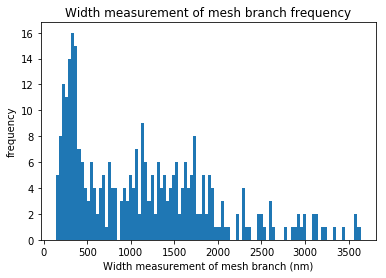

In [84]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)
bins = plt.hist(np.array(total_widths),bins=100)
ax.set_xlabel("Width measurement of mesh branch (nm)")
ax.set_ylabel("frequency")
ax.set_title("Width measurement of mesh branch frequency")
plt.show()

# Visualizing the results of the mesh decomposition

In [554]:
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons,
                          other_skeletons_colors="random",
                          html_path="two_soma_mesh_skeleton_decomp.html")

In [555]:
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:75],
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons[:75],
                          other_skeletons_colors="random",
                          html_path="two_soma_mesh_skeleton_decomp.html")

In [546]:
current_neuron = trimesh.load_mesh("/notebooks/neuron_mesh_tools/test_neurons/multi_soma_example.off")
segment_id = 12345


NameError: name 'main_mesh_verts' is not defined

In [548]:
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [549]:
soma_meshes = tu.combine_meshes(current_mesh_data[0]["soma_meshes"])
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [561]:
print("hi")

hi


In [562]:
threshold = 400
axon_meshes = np.where(np.array(total_widths) < threshold)[0]

sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                           main_mesh_faces=current_neuron.faces,
                           main_mesh_color=[0.,1.,0.,0.1],
                    other_meshes=[total_branch_meshes[k] for k in axon_meshes],
                          other_meshes_colors="random",
                          other_skeletons=[total_branch_skeletons[k] for k in axon_meshes],
                          other_skeletons_colors="random",
                        
                          html_path=f"axon_meshes_{threshold}.html")

In [114]:
print("hi")

hi


In [107]:
# Visualizing one mesh that has been completely labeled
check_index = 5
print(f"check_index = {check_index}")
print(f"divided_submeshes[check_index] = {len(total_branch_meshes[check_index].faces)}")
print(f"The width = {total_widths[check_index]}")
sk.graph_skeleton_and_mesh(
                            other_meshes=[total_branch_meshes[check_index]],
                          other_meshes_colors="black",
                           other_skeletons=[total_branch_skeletons[check_index]],
                           other_skeletons_colors="black")

check_index = 5
divided_submeshes[check_index] = 519
The width = 910.093206343433


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# How to make our results into a networkx that is conceptual

In [120]:
skeleton_ending = 5
mesh_piece = tu.combine_meshes(total_branch_meshes[:skeleton_ending])
curr_skeleton = sk.stack_skeletons(total_branch_skeletons[:skeleton_ending])
skeleton_graph = sk.convert_skeleton_to_graph(curr_skeleton)
#nx.draw(skeleton_graph,with_labels=True)

sk.graph_skeleton_and_mesh(other_meshes=[mesh_piece],
                           other_skeletons=[curr_skeleton])

In [124]:
end_nodes = xu.get_nodes_of_degree_k(skeleton_graph,1)
possible_endpoints = xu.get_node_attributes(skeleton_graph,node_list = end_nodes)

array([[ 513037.3, 1056063. ,  906505.2],
       [ 543722. , 1043130. ,  907638. ],
       [ 555945. , 1032990. ,  910372. ],
       [ 557367. , 1026600. ,  902860. ]])

In [136]:
sk = reload(sk)
from neuron import Branch

curr_branch_meshes = total_branch_meshes[:skeleton_ending]
curr_branch_skeletons = total_branch_skeletons[:skeleton_ending]
curr_widths = total_widths[:skeleton_ending]

branches = [Branch(k,v,j) for k,v,j in zip(curr_skeletons,curr_branch_meshes,curr_widths)]

starting_mesh_idx = 0
    
starting_endpoint = endpoint_coordinates[starting_mesh_idx][0]
starting_endpoint = 0

In [133]:
branches[0].endpoints[0]

array([ 513037.3, 1056063. ,  906505.2])

In [ ]:
print(check_index)
sk.graph_skeleton_and_mesh(
                            other_meshes=[curr_limb_mesh.submesh([limb_correspondence[limb_idx][check_index]["correspondence_face_idx"]],append=True)],
                          other_meshes_colors="black",
                           other_skeletons=[divided_branches[check_index]],
                           other_skeletons_colors="black")

# using the correspondence indexes

In [ ]:
#visualize in whole neuron part
sk.graph_skeleton_and_mesh(main_mesh_faces=curr_limb_mesh.faces,
                          main_mesh_verts=curr_limb_mesh.vertices,
                           edge_coordinates=current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx],
                           other_meshes=[limb_correspondence[limb_idx][check_index]["correspondence_mesh"]],
                           other_meshes_colors="red",
                           other_skeletons = [divided_branches[check_index]],
                           other_skeletons_colors="red"
                          )

In [ ]:
print(check_index)
sk.graph_skeleton_and_mesh(
                            other_meshes=[limb_correspondence[limb_idx][check_index]["correspondence_mesh"]],
                          other_meshes_colors="black",
                           other_skeletons=[divided_branches[check_index]],
                           other_skeletons_colors="black")

# checking what it originally was before the waterfilling

# Changes to be added later

In [ ]:
print(check_index)
sk.graph_skeleton_and_mesh(
                            other_meshes=[limb_correspondence[limb_idx][check_index]["correspondence_mesh"]],
                          other_meshes_colors="black",
                           other_skeletons=[divided_branches[:5]],
                           other_skeletons_colors="black")

# -- Now have to make this go for the whole neuron -- #

In [ ]:
#delete the nodes you don't like 

In [ ]:
xu = reload(xu)
dict_for_attributes = dict()
for k in limb_correspondence[limb_idx]:
    dict_for_attributes[k] = {
        "skeleton": limb_correspondence[limb_idx][k]["branch_skeleton"],
        "mesh_idx":divided_submeshes_idx[k],
        "mesh": divided_submeshes[k],
        "width":limb_correspondence[limb_idx][k]["width_from_skeleton"]
    }

xu.set_node_attributes_dict(limb_graph,dict_for_attributes)
xu.get_node_attributes(limb_graph,"skeleton")


# -- Adding the skeletons and meshes to the structure

In [71]:
#visualize in whole neuron part
check_index = 23
sk.graph_skeleton_and_mesh(main_mesh_faces=curr_limb_mesh.faces,
                          main_mesh_verts=curr_limb_mesh.vertices,
                           edge_coordinates=current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx],
                           other_meshes=[divided_submeshes[check_index]],
                           other_meshes_colors="red",
                           other_skeletons = [divided_branches[check_index]],
                           other_skeletons_colors="red"
                          )

# -- delete the wierd branches -- #

In [73]:
xu.get_neighbors(limb_graph,23)

[21, 25]

In [68]:
# check the parts that have that ratio
width_to_face_ratio = 500/100

wierd_meshes = []
for k in limb_correspondence[limb_idx]:
    curr_width = limb_correspondence[limb_idx][k]["width_from_skeleton"]
    curr_face_count = len(divided_submeshes[k].faces)
    if curr_width/curr_face_count > width_to_face_ratio:
        wierd_meshes.append(k)
    
wierd_meshes #could then eliminate them if endpoints

limb_graph_degree_1 = xu.get_nodes_of_degree_k(limb_graph,1)
print(f"wierd_meshes before = {wierd_meshes}")
set(wierd_meshes).intersection(set(limb_graph_degree_1))

wierd_meshes before = [23, 35, 37, 40, 44]


set()

# -- Find the wierd branches to filter away -- #

endpoint_coordinates.shape = (150, 3)


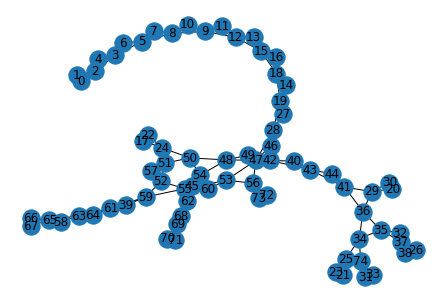

In [66]:
"""
There is a but in this where forks that are touching are connected like triangle: 

#check that they all only have two nodes with a degree of 1
not_equal_to_2 = []
for j,db in enumerate(divided_branches):
    db_graph = sk.convert_skeleton_to_graph(db)
    degree_one_nodes = xu.get_nodes_of_degree_k(db_graph,1)
    if len(degree_one_nodes) != 2:
        not_equal_to_2.append(j)
        
not_equal_to_2
"""



nu = reload(nu)
#get the endpoints of the branch
endpoint_coordinates = []
for db in divided_branches:
    db_graph = sk.convert_skeleton_to_graph(db)
    endpoint_coordinates.append(xu.get_node_attributes(db_graph,node_list=xu.get_nodes_of_degree_k(db_graph,1)))
    
endpoint_coordinates = np.array(endpoint_coordinates)
endpoint_coordinates = endpoint_coordinates.reshape(-1,3)
print(f"endpoint_coordinates.shape = {endpoint_coordinates.shape}")


# dist_matrix = nu.get_coordinate_distance_matrix(endpoint_coordinates)
# np.sum(dist_matrix[0,:] == 0)

#do the distance matrix to find 
matching_vertices = nu.get_matching_vertices(endpoint_coordinates)

#creating the actual edges 
graph_edges = np.floor(matching_vertices/2).astype("int")
limb_graph = nx.Graph(nx.from_edgelist(graph_edges))
nx.draw(limb_graph,with_labels=True)

# Creating the networkx structure

In [524]:
type(concept_graph)

NoneType

edge_endpoints_to_process was empty so exiting loop after 10 iterations
Total time for branches to concept conversion = 0.042084693908691406



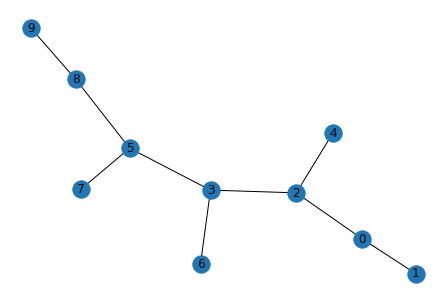

In [528]:
xu = reload(xu)
sk = reload(sk)

node_to_check_to = 10

starting_coordinate = np.array([ 513037.3, 1056063. ,  906505.2])
concept_graph = sk.branches_to_concept_graph(divided_branches[:node_to_check_to],starting_coordinate)
nx.draw(concept_graph,with_labels=True)

# Plotting the Scatter of the Points

In [538]:
sk = reload(sk)
mu = reload(mu)
random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
                          other_meshes_colors="random",
                          other_skeletons=divided_branches[:node_to_check_to],
                          other_skeletons_colors="random",
                            mesh_alpha=0.8,
                          return_other_colors=True)
random_colors_used_no_alpha = random_colors_used[:,:-1]

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [556]:
sk = reload(sk)
mu = reload(mu)
sk.graph_skeleton_and_mesh(#other_meshes=total_branch_meshes[:node_to_check_to],
                          #other_meshes_colors="random",
                          other_skeletons=divided_branches[:node_to_check_to],
                          other_skeletons_colors="random",
                            mesh_alpha=0.05)


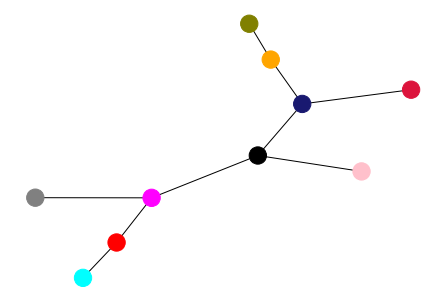

In [529]:
# plotting the concept network with the same colors
nx.draw(concept_graph,node_color=random_colors_used_no_alpha) 

In [557]:
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
[k for k in graph_nodes_skeleton]
random_colors_used[:,-1] = 1

mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in total_branch_meshes[:node_to_check_to]]
sk.graph_skeleton_and_mesh(other_scatter=mesh_midpoints,
                          other_scatter_colors=random_colors_used,
                          other_skeletons=graph_nodes_skeleton,
                          other_skeletons_colors="black",
                                               scatter_size=3)



edge_endpoints_to_process was empty so exiting loop


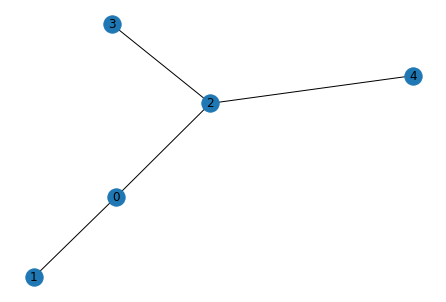

In [466]:
"""
Prework: create a nodes processed list 
0) convert each branch to just one line segment, stack the branches and then construct skeleton
1) Go to the starting node
1b) Add all edges incident and their other node label to a list to check (add the first node to processed nodes list)
2) Pop the edge edge number,endpoint of the stack
- if edge already been processed then continue
a. Find all edges incident on this node
- if no other edges then continue
b. Create edges from curent edge to those edges incident with it
c. Add the current node as processed
d. For each edge incident add the edge number and the other connecting node to the list

"""




processed_nodes = []
edge_endpoints_to_process = []
concept_network_edges = []


# 0) convert each branch to one segment and build a graph from it
curr_branch_meshes_downsampled = [sk.resize_skeleton_branch(b,n_segments=1) for b in curr_branch_skeletons]
branches_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(curr_branch_meshes_downsampled)) #can recover the original skeleton


#************************ need to just make an edges lookup dictionary*********#


#1) Identify the starting node on the starting branch
starting_node = xu.get_nodes_with_attributes_dict(branches_graph,dict(coordinates=starting_coordinate))

#1b) Add all edges incident and their other node label to a list to check (add the first node to processed nodes list)
incident_edges = xu.node_to_edges(branches_graph,starting_node)
#print(f"incident_edges = {incident_edges}")
# #incident_edges_idx = edge_to_index(incident_edges)

# #adding them to the list to be processed
edge_endpoints_to_process = [(edges,edges[edges != starting_node ]) for edges in incident_edges]
processed_nodes.append(starting_node)

for i in range(max_iterations):
    #print(f"==\n\n On iteration {i}==")
    if len(edge_endpoints_to_process) == 0:
        print("edge_endpoints_to_process was empty so exiting loop")
        break
        
    #2) Pop the edge edge number,endpoint of the stack
    edge,endpt = edge_endpoints_to_process.pop(0)
    #print(f"edge,endpt = {(edge,endpt)}")
    #- if edge already been processed then continue
    if endpt in processed_nodes:
        #print(f"Already processed endpt = {endpt} so skipping")
        continue
    #a. Find all edges incident on this node
    incident_edges = xu.node_to_edges(branches_graph,endpt)
    #print(f"incident_edges = {incident_edges}")
    
    considering_edges = [k for k in incident_edges if not np.array_equal(k,edge) and not np.array_equal(k,np.flip(edge))]
    #print(f"considering_edges = {considering_edges}")
    #b. Create edges from curent edge to those edges incident with it
    concept_network_edges += [(edge,k) for k in considering_edges]
    
    #c. Add the current node as processed
    processed_nodes.append(endpt)
    
    #d. For each edge incident add the edge and the other connecting node to the list
    new_edge_processing = [(e,e[e != endpt ]) for e in considering_edges]
    edge_endpoints_to_process = edge_endpoints_to_process + new_edge_processing
    #print(f"edge_endpoints_to_process = {edge_endpoints_to_process}")
    
if len(edge_endpoints_to_process)>0:
    raise Exception(f"Reached max_interations of {max_iterations} and the edge_endpoints_to_process not empty")

#flattening the connections so we can get the indexes of these edges
flattened_connections = np.array(concept_network_edges).reshape(-1,2)
orders = xu.get_edge_attributes(branches_graph,edge_list=flattened_connections)
concept_network_edges_fixed = np.array(orders).reshape(-1,2)

# # while 
# # edge_endpoints_to_process
concept_graph = nx.from_edgelist(concept_network_edges_fixed)
nx.draw(concept_graph,with_labels=True)


In [205]:
# """
# Prework: create a nodes processed list 
# 0) convert each branch to just one line segment, stack the branches and then construct skeleton
# 1) Go to the starting node
# 1b) Add all edges incident and their other node label to a list to check (add the first node to processed nodes list)
# 2) Pop the edge edge number,endpoint of the stack
# - if edge already been processed then continue
# a. Find all edges incident on this node
# - if no other edges then continue
# b. Create edges from curent edge to those edges incident with it
# c. Add the current node as processed
# d. For each edge incident add the edge number and the other connecting node to the list

# """



# xu = reload(xu)

# processed_nodes = []
# edge_endpoints_to_process = []
# concept_network_edges = []


# # 0) convert each branch to one segment and build a graph from it
# curr_branch_meshes_downsampled = [sk.resize_skeleton_branch(b,n_segments=1) for b in curr_branch_skeletons]
# branches_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(curr_branch_meshes_downsampled)) #can recover the original skeleton


# #************************ need to just make an edges lookup dictionary*********#

# max_iterations = len(branches_graph.nodes())

# #Identify the starting node on the starting branch = 
# starting_coordinate = np.array([ 513037.3, 1056063. ,  906505.2])


# #1) Identify the starting node on the starting branch
# starting_node = xu.get_nodes_with_attributes_dict(branches_graph,dict(coordinates=starting_coordinate))

# #1b) Add all edges incident and their other node label to a list to check (add the first node to processed nodes list)
# incident_edges = np.array(xu.edge_to_index(branches_graph,xu.node_to_edges(branches_graph,starting_node)))
# incident_edges_idx = edge_to_index(incident_edges)

# #adding them to the list to be processed
# edge_endpoints_to_process = [(idx,edges[edges != starting_node ]) for idx,edges in zip(incident_edges_idx,incident_edges)]
# processed_nodes.append(starting_node)

# for i in range(branches_graph):
#     if len(edge_endpoints_to_process) == 0:
#         print("edge_endpoints_to_process was empty so exiting loop")
#         break
#     #2) Pop the edge edge number,endpoint of the stack
#     edge_idx,endpt = edge_endpoints_to_process.pop(0)
#     #- if edge already been processed then continue
#     if endpt in processed_nodes:
#         continue
#     #a. Find all edges incident on this node
#     incident_edges = np.array(xu.edge_to_index(branches_graph,xu.node_to_edges(branches_graph,endpt)))
#     incident_edges_idx = edge_to_index(incident_edges)
    
#     #b. Create edges from curent edge to those edges incident with it
#     concept_network_edges += [(edge_idx,k) for k in incident_edges_idx if k != edge_idx]
    
#     #c. Add the current node as processed
#     processed_nodes(endpt)
    
#     #d. For each edge incident add the edge number and the other connecting node to the list
#     new_edge_processing = [(idx,edges[edges != starting_node ]) for idx,edges in zip(incident_edges_idx,incident_edges) if idx != edge_idx]
#     edge_endpoints_to_process = edge_endpoints_to_process + new_edge_processing
    
    
    

# # while 
# # edge_endpoints_to_process
# concept_graph = nx.from_edgelist(concept_network_edges)



IndexError: index 0 is out of bounds for axis 0 with size 0